In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

# Operações com o dado licitação

#### O separador do arquigo é vírgula, porém o DS_OBJETO às vezes tinha vírgula na decrição, então dei um sed s/, / /g para substituir as vírgulas espaço por espaço

In [2]:
licitacoes=pd.read_csv('2017/licitacao_editada.csv', sep = ',', low_memory=False)

In [3]:
print(licitacoes.columns.values)

['CD_ORGAO' 'NM_ORGAO' 'NR_LICITACAO' 'ANO_LICITACAO' 'CD_TIPO_MODALIDADE'
 'NR_COMISSAO' 'ANO_COMISSAO' 'TP_COMISSAO' 'NR_PROCESSO' 'ANO_PROCESSO'
 'TP_OBJETO' 'CD_TIPO_FASE_ATUAL' 'TP_LICITACAO' 'TP_NIVEL_JULGAMENTO'
 'DT_AUTORIZACAO_ADESAO' 'TP_CARACTERISTICA_OBJETO' 'TP_NATUREZA'
 'TP_REGIME_EXECUCAO' 'BL_PERMITE_SUBCONTRATACAO' 'TP_BENEFICIO_MICRO_EPP'
 'TP_FORNECIMENTO' 'TP_ATUACAO_REGISTRO' 'NR_LICITACAO_ORIGINAL'
 'ANO_LICITACAO_ORIGINAL' 'NR_ATA_REGISTRO_PRECO' 'DT_ATA_REGISTRO_PRECO'
 'PC_TAXA_RISCO' 'TP_EXECUCAO' 'TP_DISPUTA' 'TP_PREQUALIFICACAO'
 'BL_INVERSAO_FASES' 'TP_RESULTADO_GLOBAL' 'CNPJ_ORGAO_GERENCIADOR'
 'NM_ORGAO_GERENCIADOR' 'DS_OBJETO' 'CD_TIPO_FUNDAMENTACAO' 'NR_ARTIGO'
 'DS_INCISO' 'DS_LEI' 'DT_INICIO_INSCR_CRED' 'DT_FIM_INSCR_CRED'
 'DT_INICIO_VIGEN_CRED' 'DT_FIM_VIGEN_CRED' 'VL_LICITACAO'
 'BL_ORCAMENTO_SIGILOSO' 'BL_RECEBE_INSCRICAO_PER_VIG'
 'BL_PERMITE_CONSORCIO' 'DT_ABERTURA' 'DT_HOMOLOGACAO' 'DT_ADJUDICACAO'
 'BL_LICIT_PROPRIA_ORGAO' 'TP_DOCUMENTO_FORNE

In [4]:
licitacoes

CD_ORGAO                                           NM_ORGAO  \
0         47500                               PM DE ESTÂNCIA VELHA   
1         85900                                        PM DE TABAÍ   
2         75300                                   PM DE DERRUBADAS   
3         53411  INST. DE PREV. E ASSIST. DOS SERV. MUNIC. DE N...   
4         88027                                PM DE CAPÃO DO CIPÓ   
...         ...                                                ...   
62882     53302              INST. PREV. ASSIST. MUN. - NOVA PRATA   
62883     63500                                  PM DE CHARQUEADAS   
62884     54907    DEP. MUNICIPAL DE ÁGUA E ESGOTOS - PORTO ALEGRE   
62885     78200                              PM DE NOVA SANTA RITA   
62886     68701                                   CM DE JABOTICABA   

       NR_LICITACAO  ANO_LICITACAO CD_TIPO_MODALIDADE  NR_COMISSAO  \
0              68.0           2017                PRP         16.0   
1               4.0           2017                PRD          NaN   
2               2.0           2017                PRP        122.0   
3               1.0           2017                LEI         30.0   
4               1.0           2017                PRP        123.0   
...             ...            ...                ...          ...   
62882          10.0           2017                PRD          NaN   
62883           1.0           2017                TMP     482017.0   
62884        1026.0           2017                PRI          NaN   
62885        6571.0           2017                PRD          NaN   
62886           1.0           2017                TMP          2.0   

       ANO_COMISSAO TP_COMISSAO         NR_PROCESSO ANO_PROCESSO  ...  \
0            2017.0           G                 144         2017  ...   
1               NaN         NaN                  05         2017  ...   
2            2016.0           G                   3         2017  ...   
3            2016.0           G    2016.52.803139PA         2016  ...   
4            2017.0           G                   1         2017  ...   
...             ...         ...                 ...          ...  ...   
62882           NaN         NaN                  02         2017  ...   
62883        2017.0           P                 190         2017  ...   
62884           NaN         NaN  17.10.000005361-8          2017  ...   
62885           NaN         NaN                6571         2017  ...   
62886        2018.0           P                  01         2017  ...   

      TP_DOCUMENTO_FORNECEDOR NR_DOCUMENTO_FORNECEDOR TP_DOCUMENTO_VENCEDOR  \
0                         NaN                     NaN                   NaN   
1                           J          22148846000106                   NaN   
2                         NaN                     NaN                   NaN   
3                         NaN                     NaN                   NaN   
4                         NaN                     NaN                   NaN   
...                       ...                     ...                   ...   
62882                     NaN                     NaN                   NaN   
62883                     NaN                     NaN                   NaN   
62884                     NaN                     NaN                   NaN   
62885                       F             22236600020                   NaN   
62886                     NaN                     NaN                     J   

      NR_DOCUMENTO_VENCEDOR VL_HOMOLOGADO BL_GERA_DESPESA DS_OBSERVACAO  \
0                       NaN           NaN               S           NaN   
1                       NaN           NaN               S           NaN   
2                       NaN           NaN               S           NaN   
3                       NaN           NaN               S           NaN   
4                       NaN    1112500.00               S           NaN   
...                     ...           ...        

# Checando quantos valores faltantes existem

In [5]:
pd.set_option('display.max_rows', 1000)
print("Missing values: ", licitacoes.isnull().sum())

Missing values:  CD_ORGAO                           0
NM_ORGAO                           0
NR_LICITACAO                       0
ANO_LICITACAO                      0
CD_TIPO_MODALIDADE                 0
NR_COMISSAO                    20910
ANO_COMISSAO                   20910
TP_COMISSAO                    20894
NR_PROCESSO                        7
ANO_PROCESSO                       7
TP_OBJETO                          0
CD_TIPO_FASE_ATUAL                 0
TP_LICITACAO                       0
TP_NIVEL_JULGAMENTO               51
DT_AUTORIZACAO_ADESAO          62585
TP_CARACTERISTICA_OBJETO           0
TP_NATUREZA                       49
TP_REGIME_EXECUCAO             49828
BL_PERMITE_SUBCONTRATACAO      19306
TP_BENEFICIO_MICRO_EPP            21
TP_FORNECIMENTO                27913
TP_ATUACAO_REGISTRO            56239
NR_LICITACAO_ORIGINAL          62586
ANO_LICITACAO_ORIGINAL         51823
NR_ATA_REGISTRO_PRECO          62586
DT_ATA_REGISTRO_PRECO          62588
PC_TAXA_RISCO        

# Escolhendo as principais colunas e com poucos valores faltantes para formação do dataframe

In [6]:
df = licitacoes.loc[:,['CD_ORGAO', 'NM_ORGAO', 'NR_LICITACAO', 'ANO_LICITACAO', 'CD_TIPO_MODALIDADE', 'NR_PROCESSO', 'ANO_PROCESSO', 'TP_OBJETO', 'CD_TIPO_FASE_ATUAL', 'TP_LICITACAO', 'DS_OBJETO', 'VL_LICITACAO']]

In [7]:
df

CD_ORGAO                                           NM_ORGAO  \
0         47500                               PM DE ESTÂNCIA VELHA   
1         85900                                        PM DE TABAÍ   
2         75300                                   PM DE DERRUBADAS   
3         53411  INST. DE PREV. E ASSIST. DOS SERV. MUNIC. DE N...   
4         88027                                PM DE CAPÃO DO CIPÓ   
...         ...                                                ...   
62882     53302              INST. PREV. ASSIST. MUN. - NOVA PRATA   
62883     63500                                  PM DE CHARQUEADAS   
62884     54907    DEP. MUNICIPAL DE ÁGUA E ESGOTOS - PORTO ALEGRE   
62885     78200                              PM DE NOVA SANTA RITA   
62886     68701                                   CM DE JABOTICABA   

       NR_LICITACAO  ANO_LICITACAO CD_TIPO_MODALIDADE         NR_PROCESSO  \
0              68.0           2017                PRP                 144   
1               4.0           2017                PRD                  05   
2               2.0           2017                PRP                   3   
3               1.0           2017                LEI    2016.52.803139PA   
4               1.0           2017                PRP                   1   
...             ...            ...                ...                 ...   
62882          10.0           2017                PRD                  02   
62883           1.0           2017                TMP                 190   
62884        1026.0           2017                PRI  17.10.000005361-8    
62885        6571.0           2017                PRD                6571   
62886           1.0           2017                TMP                  01   

      ANO_PROCESSO TP_OBJETO CD_TIPO_FASE_ATUAL TP_LICITACAO  \
0             2017       OUS                ADH          MPR   
1             2017       OUS                PUB          NSA   
2             2017       COM                ADH          MPR   
3             2016       ALB                HAP          MLO   
4             2017       COM                ADH          MPR   
...            ...       ...                ...          ...   
62882         2017       CSE                PUB          NSA   
62883         2017       OSE                ADH          MPR   
62884         2017       OUS                PUB          NSA   
62885         2017       CSE                PUB          NSA   
62886         2017       LOC                ADH          MPR   

                                               DS_OBJETO VL_LICITACAO  
0      CONTRATAÇÃO EXCLUSIVA PARA EMPRESAS BENEFICIÁR...     72691.16  
1      CONTRATAÇÃO DE EMPRESA PARA PRESTAR SERVIÇOS D...      7966.70  
2                                Aquisição de alimentos.     65808.91  
3                   VEÍCULO MICROÔNIBUS KIA BESTA 12P GS      5800.00  
4      AQUISIÇÃO DE COMBUSTIVEIS PARA MANUTENÇÃO DA F...   1058588.00  
...                                                  ...          ...  
62882  CONTRATAÇÃO EMPRESA PARA PRESTAÇÃO DE SERVIÇOS...      8804.88  
62883  CONTRATACAO DE EMPRESA PARA CONSTRUCAO DE 80 T...    125970.00  
62884  Contratação de serviço de suporte técnico e ma...    226920.00  
62885             Locação de imóvel para a sede da SMDUH     33840.00  
62886  LOCAÇÃO E MANUTENÇÃO DE SOFTWARE/SISTEMA DE IN...     22524.84  

[62887 rows x 12 columns]

### Alguns valores no campo valor licitação estava com valores S e N que seriam de outra coluna, então tirei as linhas que estavam com esses valores errôneos

In [8]:
new_df = df[df.VL_LICITACAO != ('S' or 'N')]

In [9]:
new_df

CD_ORGAO                                           NM_ORGAO  \
0         47500                               PM DE ESTÂNCIA VELHA   
1         85900                                        PM DE TABAÍ   
2         75300                                   PM DE DERRUBADAS   
3         53411  INST. DE PREV. E ASSIST. DOS SERV. MUNIC. DE N...   
4         88027                                PM DE CAPÃO DO CIPÓ   
...         ...                                                ...   
62882     53302              INST. PREV. ASSIST. MUN. - NOVA PRATA   
62883     63500                                  PM DE CHARQUEADAS   
62884     54907    DEP. MUNICIPAL DE ÁGUA E ESGOTOS - PORTO ALEGRE   
62885     78200                              PM DE NOVA SANTA RITA   
62886     68701                                   CM DE JABOTICABA   

       NR_LICITACAO  ANO_LICITACAO CD_TIPO_MODALIDADE         NR_PROCESSO  \
0              68.0           2017                PRP                 144   
1               4.0           2017                PRD                  05   
2               2.0           2017                PRP                   3   
3               1.0           2017                LEI    2016.52.803139PA   
4               1.0           2017                PRP                   1   
...             ...            ...                ...                 ...   
62882          10.0           2017                PRD                  02   
62883           1.0           2017                TMP                 190   
62884        1026.0           2017                PRI  17.10.000005361-8    
62885        6571.0           2017                PRD                6571   
62886           1.0           2017                TMP                  01   

      ANO_PROCESSO TP_OBJETO CD_TIPO_FASE_ATUAL TP_LICITACAO  \
0             2017       OUS                ADH          MPR   
1             2017       OUS                PUB          NSA   
2             2017       COM                ADH          MPR   
3             2016       ALB                HAP          MLO   
4             2017       COM                ADH          MPR   
...            ...       ...                ...          ...   
62882         2017       CSE                PUB          NSA   
62883         2017       OSE                ADH          MPR   
62884         2017       OUS                PUB          NSA   
62885         2017       CSE                PUB          NSA   
62886         2017       LOC                ADH          MPR   

                                               DS_OBJETO VL_LICITACAO  
0      CONTRATAÇÃO EXCLUSIVA PARA EMPRESAS BENEFICIÁR...     72691.16  
1      CONTRATAÇÃO DE EMPRESA PARA PRESTAR SERVIÇOS D...      7966.70  
2                                Aquisição de alimentos.     65808.91  
3                   VEÍCULO MICROÔNIBUS KIA BESTA 12P GS      5800.00  
4      AQUISIÇÃO DE COMBUSTIVEIS PARA MANUTENÇÃO DA F...   1058588.00  
...                                                  ...          ...  
62882  CONTRATAÇÃO EMPRESA PARA PRESTAÇÃO DE SERVIÇOS...      8804.88  
62883  CONTRATACAO DE EMPRESA PARA CONSTRUCAO DE 80 T...    125970.00  
62884  Contratação de serviço de suporte técnico e ma...    226920.00  
62885             Locação de imóvel para a sede da SMDUH     33840.00  
62886  LOCAÇÃO E MANUTENÇÃO DE SOFTWARE/SISTEMA DE IN...     22524.84  

[62871 rows x 12 columns]

# Checando os valores faltantes do novo dataframe

In [10]:
print("Missing values: ", new_df.isnull().sum())

Missing values:  CD_ORGAO                 0
NM_ORGAO                 0
NR_LICITACAO             0
ANO_LICITACAO            0
CD_TIPO_MODALIDADE       0
NR_PROCESSO              7
ANO_PROCESSO             7
TP_OBJETO                0
CD_TIPO_FASE_ATUAL       0
TP_LICITACAO             0
DS_OBJETO               62
VL_LICITACAO          1728
dtype: int64


# Como todos os processos são de 2017, posso preencher todas as linhas do ano do processo pelo ano 2017, e assim não haverá dados faltantes nessa coluna

In [11]:
new_df.loc[:,'ANO_PROCESSO'] = 2017

/home/thais/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


# Removendo as linhas que contém dados faltantes

In [12]:
licitacoes_nova = new_df.dropna(subset=['NR_PROCESSO', 'DS_OBJETO', 'VL_LICITACAO'])

In [13]:
print("Missing values: ", licitacoes_nova.isnull().sum())

Missing values:  CD_ORGAO              0
NM_ORGAO              0
NR_LICITACAO          0
ANO_LICITACAO         0
CD_TIPO_MODALIDADE    0
NR_PROCESSO           0
ANO_PROCESSO          0
TP_OBJETO             0
CD_TIPO_FASE_ATUAL    0
TP_LICITACAO          0
DS_OBJETO             0
VL_LICITACAO          0
dtype: int64


In [14]:
for column in licitacoes_nova.columns:
     print("\n" + column)
     print(licitacoes_nova[column].value_counts())


CD_ORGAO
49300    963
88038    751
63400    713
49100    615
83100    509
        ... 
70701      1
3800       1
64801      1
59301      1
62001      1
Name: CD_ORGAO, Length: 1022, dtype: int64

NM_ORGAO
PM DE GUAPORÉ                                        963
PM DE PEDRAS ALTAS                                   751
PM DE CAPÃO DA CANOA                                 713
PM DE GRAVATAÍ                                       615
PM DE NOVA RAMADA                                    509
                                                    ... 
FUND. DE AMPARO À PESQUISA DO ESTADO                   1
CM DE COXILHA                                          1
CM DE CRUZEIRO DO SUL                                  1
CONS. INTERM. ABRIGO INSTITUCIONAL DA PAZ - CIAIP      1
CM DE RIOZINHO                                         1
Name: NM_ORGAO, Length: 1022, dtype: int64

NR_LICITACAO
1.00           3553
2.00           2832
3.00           2376
4.00           2056
5.00           1848
          

# Selecionando as licitações cujo TP_OBJETO seja compra, como foi sugerido no pdf da descrição do teste técnico

In [15]:
licitacoes_compra = licitacoes_nova[licitacoes_nova['TP_OBJETO'] == 'COM']

# Checando se há linhas duplicadas

In [16]:
print("Duplicated values: ", df.duplicated().sum())

Duplicated values:  0


# Convertendo a coluna de VL_LICITAÇÃO em float

In [17]:
licitacoes_compra['VL_LICITACAO'] = pd.to_numeric(licitacoes_compra['VL_LICITACAO'],errors='coerce')
licitacoes_compra.dtypes

/home/thais/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


CD_ORGAO                int64
NM_ORGAO               object
NR_LICITACAO          float64
ANO_LICITACAO           int64
CD_TIPO_MODALIDADE     object
NR_PROCESSO            object
ANO_PROCESSO            int64
TP_OBJETO              object
CD_TIPO_FASE_ATUAL     object
TP_LICITACAO           object
DS_OBJETO              object
VL_LICITACAO          float64
dtype: object

# Checando a estatística dos valores de licitação

In [18]:
licitacoes_compra['VL_LICITACAO'].describe()

count    2.146500e+04
mean     2.736111e+06
std      3.147592e+08
min      0.000000e+00
25%      4.816800e+03
50%      2.280000e+04
75%      9.170000e+04
max      4.598750e+10
Name: VL_LICITACAO, dtype: float64

# Observando quais palavras são mais relevantes na descrição do objeto (DS_OBJETO) das compras para tentar saber quais foram os objetos que tiveram mais gastos públicos

In [19]:
def nuvem_palavras(coluna_dataframe):
    
    palavras = ''
    stopwords= set(STOPWORDS)

    # Lista de palavras que não serão contabilizadas
    novas_palavras = ["de", "da", "do", "para", "dos", "das", 
                     "em", "aquisição", "por", "preço", "registro", 
                     "preços", "um", "através", "na", "no", "ou", 
                      "preco", "compra", "aquisição", "aquisicao", "uso", 
                      "realizada", "despesa", "2019", "nº", "rs", "bonito",
                      "processo", "objeto"]

    with open("stop_words_pt.txt", 'r') as f:
        [novas_palavras.append(palavras) for linha in f for palavras in linha.split()]

    nova_stopwords = stopwords.union(novas_palavras)

    for val in coluna_dataframe: 

        # converter cada linha para string 
        val = str(val) 

        # splitar cada linha em uma lista de palavras (tokens)
        tokens = val.split() 

        # Converter cada token em letra minuscula
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower() 

        palavras += " ".join(tokens)+" "

    # Formando a nunvem de palavras    
    wordcloud = WordCloud(width = 500, height = 500, 
                    background_color ='white', 
                    stopwords = nova_stopwords, 
                    min_font_size = 10).generate(palavras) 

    # Plotando a imagem de nuvem de palavras                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 

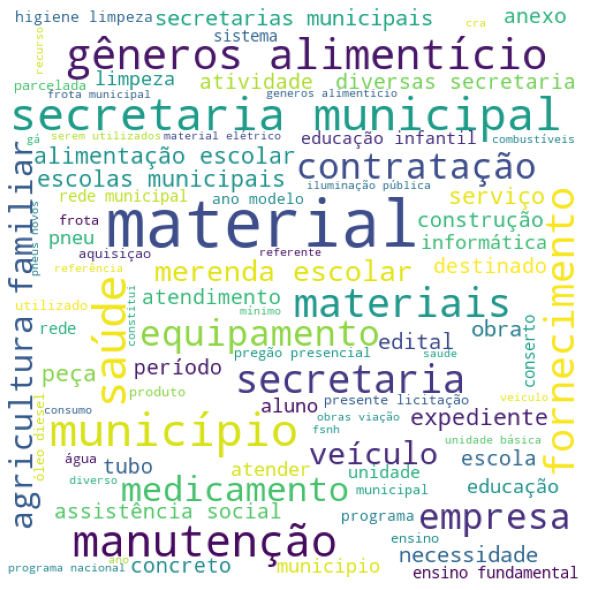

In [20]:
nuvem_palavras(licitacoes_compra.DS_OBJETO)

# Trabalhando com os dados licitante e proposta

In [21]:
licitantes=pd.read_csv('2017/licitante.csv', sep = ',', low_memory=False)
propostas=pd.read_csv('2017/proposta.csv', sep = ',', low_memory=False)

In [22]:
licitantes

CD_ORGAO  NR_LICITACAO  ANO_LICITACAO CD_TIPO_MODALIDADE TP_DOCUMENTO  \
0          77200             8           2017                PRE            J   
1          53100            37           2017                PRP            J   
2          53100            38           2017                PRP            J   
3          75000            36           2017                PRP            J   
4          84100            13           2017                CNV            J   
...          ...           ...            ...                ...          ...   
109456     86800            44           2017                PRP            J   
109457     74000             4           2017                PRP            J   
109458     75000             3           2017                PRP            J   
109459     86800             1           2017                LEI            F   
109460     86800             2           2017                CPC            J   

          NR_DOCUMENTO TP_DOCUMENTO.1  NR_DOCUMENTO.1 TP_CONDICAO  \
0       03562696000138              F    4.082086e+10         NaN   
1       02986622000166              F    8.859340e+08         NaN   
2       02986622000166              F    8.859340e+08         NaN   
3       12347149000120              F    2.961240e+08         NaN   
4       01733345000117              F    3.471803e+10         CEP   
...                ...            ...             ...         ...   
109456  02934207000169            NaN             NaN         NaN   
109457  91209106000155            NaN             NaN         NaN   
109458  94479995000169            NaN             NaN         NaN   
109459     57663475020            NaN             NaN         NaN   
109460  15636388000199            NaN             NaN         NaN   

       TP_RESULTADO_HABILITACAO BL_BENEFICIO_MICRO_EPP  
0                           NaN                      N  
1                           NaN                    NaN  
2                           NaN                      N  
3                           NaN                    NaN  
4                           NaN                      S  
...                         ...                    ...  
109456                        H                      S  
109457                      NaN                      S  
109458                      NaN                    NaN  
109459                      NaN                    NaN  
109460                      NaN                    NaN  

[109461 rows x 11 columns]

In [23]:
propostas

CD_ORGAO  NR_LICITACAO  ANO_LICITACAO CD_TIPO_MODALIDADE TP_DOCUMENTO  \
0          77200            18           2017                PRP            J   
1          77200             8           2017                PRE            J   
2          84100            27           2017                CNV            J   
3          84100            27           2017                CNV            J   
4          53100             1           2017                PRP            J   
...          ...           ...            ...                ...          ...   
109456     56500             7           2017                PRP            F   
109457     72700             3           2017                CHP            F   
109458     72700             1           2017                CHP            F   
109459     54700            52           2017                CHP            F   
109460     50300             1           2017                LEI            F   

          NR_DOCUMENTO DT_PROPOSTA TP_RESULTADO_PROPOSTA  VL_TOTAL_PROPOSTA  \
0       07016855000150  2017-12-21                   NaN          549923.02   
1       03562696000138  2017-07-05                   NaN           16540.00   
2       06233397000148  2017-03-27                   NaN           18240.00   
3       90167065000119  2017-03-27                   NaN           18362.00   
4       11788359000191  2017-01-24                   NaN             233.00   
...                ...         ...                   ...                ...   
109456     45900604004  2017-05-04                   NaN            6596.00   
109457     49692402053  2017-06-21                   NaN             522.00   
109458     49692402053  2017-03-01                   NaN            1085.00   
109459     51759020087  2017-08-22                     C            5072.40   
109460     51775778053  2017-06-20                   NaN            4200.00   

        PC_DESCONTO  VL_NOTA_TECNICA DT_HOMOLOGACAO  PC_TX  
0               NaN              NaN            NaN    NaN  
1               NaN              NaN            NaN    NaN  
2               NaN              NaN            NaN    NaN  
3               NaN              NaN            NaN    NaN  
4               NaN              NaN            NaN    NaN  
...             ...              ...            ...    ...  
109456          NaN              NaN            NaN    NaN  
109457          0.0              0.0            NaN    NaN  
109458          0.0              0.0            NaN    NaN  
109459          NaN              NaN     2017-08-28    NaN  
109460          0.0              0.0            NaN    NaN  

[109461 rows x 13 columns]

# Esses dados tem relacionamento 1:1 e as colunas abaixo, são iguais em ambos os dados, então eu posso juntar esses 2 dados em um só

In [24]:
licitante_propostas = pd.merge(licitantes, propostas, on=['CD_ORGAO', 'NR_LICITACAO', 'ANO_LICITACAO', 'CD_TIPO_MODALIDADE', 'TP_DOCUMENTO', 'NR_DOCUMENTO'])

In [25]:
licitante_propostas

CD_ORGAO  NR_LICITACAO  ANO_LICITACAO CD_TIPO_MODALIDADE TP_DOCUMENTO  \
0          77200             8           2017                PRE            J   
1          53100            37           2017                PRP            J   
2          53100            38           2017                PRP            J   
3          75000            36           2017                PRP            J   
4          84100            13           2017                CNV            J   
...          ...           ...            ...                ...          ...   
109456     86800            44           2017                PRP            J   
109457     74000             4           2017                PRP            J   
109458     75000             3           2017                PRP            J   
109459     86800             1           2017                LEI            F   
109460     86800             2           2017                CPC            J   

          NR_DOCUMENTO TP_DOCUMENTO.1  NR_DOCUMENTO.1 TP_CONDICAO  \
0       03562696000138              F    4.082086e+10         NaN   
1       02986622000166              F    8.859340e+08         NaN   
2       02986622000166              F    8.859340e+08         NaN   
3       12347149000120              F    2.961240e+08         NaN   
4       01733345000117              F    3.471803e+10         CEP   
...                ...            ...             ...         ...   
109456  02934207000169            NaN             NaN         NaN   
109457  91209106000155            NaN             NaN         NaN   
109458  94479995000169            NaN             NaN         NaN   
109459     57663475020            NaN             NaN         NaN   
109460  15636388000199            NaN             NaN         NaN   

       TP_RESULTADO_HABILITACAO BL_BENEFICIO_MICRO_EPP DT_PROPOSTA  \
0                           NaN                      N  2017-07-05   
1                           NaN                    NaN  2017-10-10   
2                           NaN                      N  2017-11-14   
3                           NaN                    NaN  2017-10-02   
4                           NaN                      S  2017-02-24   
...                         ...                    ...         ...   
109456                        H                      S  2018-01-16   
109457                      NaN                      S  2017-08-11   
109458                      NaN                    NaN  2017-02-01   
109459                      NaN                    NaN  2017-09-11   
109460                      NaN                    NaN  2017-02-04   

       TP_RESULTADO_PROPOSTA  VL_TOTAL_PROPOSTA  PC_DESCONTO  VL_NOTA_TECNICA  \
0                        NaN           16540.00          NaN              NaN   
1                        NaN           19509.00          NaN              NaN   
2                        NaN          139600.00          NaN              NaN   
3                        NaN           22600.00          NaN              NaN   
4                        NaN           12843.08          NaN              NaN   
...                      ...                ...          ...              ...   
109456                     C          207000.00          NaN              NaN   
109457                   NaN           25103.10          NaN              NaN   
109458                   NaN           17659.30          NaN              NaN   
109459                   NaN            3210.00          NaN              NaN   
109460                   NaN                NaN          NaN              NaN   

       DT_HOMOLOGACAO  PC_TX  
0                 NaN    NaN  
1                 NaN    NaN  
2                 NaN    NaN  
3                 NaN    NaN  
4                 NaN    NaN  
...               ...    ...  
109456            NaN    NaN  
109457            NaN    NaN  
109458            NaN    NaN  
109459            NaN    NaN  
109460            NaN    NaN  

[109461 rows x 18 c

# Checando valores faltantes

In [26]:
print("Missing values: ", licitante_propostas.isnull().sum())

Missing values:  CD_ORGAO                         0
NR_LICITACAO                     0
ANO_LICITACAO                    0
CD_TIPO_MODALIDADE               0
TP_DOCUMENTO                     0
NR_DOCUMENTO                     0
TP_DOCUMENTO.1               47008
NR_DOCUMENTO.1               47008
TP_CONDICAO                  84463
TP_RESULTADO_HABILITACAO     94691
BL_BENEFICIO_MICRO_EPP       14826
DT_PROPOSTA                      0
TP_RESULTADO_PROPOSTA        90722
VL_TOTAL_PROPOSTA            17162
PC_DESCONTO                  75467
VL_NOTA_TECNICA              86397
DT_HOMOLOGACAO               88937
PC_TX                       109418
dtype: int64


# Checando valores duplicados

In [27]:
print("Duplicated values: ", licitante_propostas.duplicated().sum())

Duplicated values:  0


# Observando as estatísticas das colunas que são valores numéricos

In [28]:
licitante_propostas.describe()

CD_ORGAO  NR_LICITACAO  ANO_LICITACAO  NR_DOCUMENTO.1  \
count  109461.000000  1.094610e+05       109461.0    6.245300e+04   
mean    60244.206475  2.942469e+03         2017.0    3.990985e+10   
std     16151.738905  3.246939e+05            0.0    3.359737e+10   
min       200.000000  1.000000e+00         2017.0    0.000000e+00   
25%     49300.000000  5.000000e+00         2017.0    2.717988e+09   
50%     58900.000000  1.600000e+01         2017.0    3.840969e+10   
75%     71500.000000  4.400000e+01         2017.0    6.799556e+10   
max     88394.000000  1.000002e+08         2017.0    9.999562e+10   

       VL_TOTAL_PROPOSTA   PC_DESCONTO  VL_NOTA_TECNICA      PC_TX  
count       9.229900e+04  33994.000000     23064.000000  43.000000  
mean        1.652242e+06      0.033785         1.900098   1.033488  
std         1.971126e+08      2.253033       215.257573   5.753705  
min        -4.836000e+01      0.000000         0.000000  -4.200000  
25%         3.708745e+03      0.000000         0.000000   0.000000  
50%         1.940000e+04      0.000000         0.000000   0.000000  
75%         7.500000e+04      0.000000         0.000000   0.000000  
max         3.837034e+10    354.000000     32400.000000  34.000000

# Remover as linhas que têm dados faltantes em VL_TOTAL_PROPOSTA

In [29]:
licitante_propostas_nova = licitante_propostas.dropna(subset=['VL_TOTAL_PROPOSTA'])

# Checando os valores faltantes no novo dataframe

In [30]:
print("Missing values: ", licitante_propostas_nova.isnull().sum())

Missing values:  CD_ORGAO                        0
NR_LICITACAO                    0
ANO_LICITACAO                   0
CD_TIPO_MODALIDADE              0
TP_DOCUMENTO                    0
NR_DOCUMENTO                    0
TP_DOCUMENTO.1              36646
NR_DOCUMENTO.1              36646
TP_CONDICAO                 74936
TP_RESULTADO_HABILITACAO    80812
BL_BENEFICIO_MICRO_EPP      12967
DT_PROPOSTA                     0
TP_RESULTADO_PROPOSTA       73709
VL_TOTAL_PROPOSTA               0
PC_DESCONTO                 58847
VL_NOTA_TECNICA             69302
DT_HOMOLOGACAO              71842
PC_TX                       92263
dtype: int64


# Criando um novo dataframe com as colunas mais importantes e com poucos dados faltantes

In [31]:
licitacoes_vencedoras = licitante_propostas_nova.loc[:,['CD_ORGAO','NR_LICITACAO', 'ANO_LICITACAO', 'CD_TIPO_MODALIDADE', 'NR_DOCUMENTO', 'DT_PROPOSTA', 'VL_TOTAL_PROPOSTA', 'TP_RESULTADO_PROPOSTA']]

# Criando um dataframe apenas com as licitação que têm o resultado da posposta (vencedora, perdedora ou pendente)

In [32]:
licitacoes_vencedoras = licitacoes_vencedoras.dropna(subset=['TP_RESULTADO_PROPOSTA'])

# Escolhendo apenas as licitações classificadas como vencedoras

In [33]:
licitacoes_vencedoras = licitacoes_vencedoras[licitacoes_vencedoras['TP_RESULTADO_PROPOSTA'] == 'C']

In [34]:
licitacoes_vencedoras

CD_ORGAO  NR_LICITACAO  ANO_LICITACAO CD_TIPO_MODALIDADE  \
12         74000             2           2017                PRP   
26         53100            19           2017                PRP   
39         45003            74           2017                PRP   
41         45003            88           2017                PRP   
57         53100            31           2017                PRP   
...          ...           ...            ...                ...   
109429     86800             6           2017                PRP   
109430     86800            33           2017                PRP   
109438     86800             7           2017                TMP   
109455     86800             2           2017                PRP   
109456     86800            44           2017                PRP   

          NR_DOCUMENTO DT_PROPOSTA  VL_TOTAL_PROPOSTA TP_RESULTADO_PROPOSTA  
12      02408795000369  2017-06-24          127215.00                     C  
26      12444649000180  2017-04-24             238.50                     C  
39      02324209000136  2017-10-17           52999.50                     C  
41      02324209000136  2017-11-22           45998.82                     C  
57      87660932000149  2017-09-06             280.00                     C  
...                ...         ...                ...                   ...  
109429  89358006000149  2017-02-24           20930.00                     C  
109430  89358006000149  2017-10-16           23920.00                     C  
109438  94160652000137  2017-04-12           93440.00                     C  
109455  02934207000169  2017-01-27          354000.00                     C  
109456  02934207000169  2018-01-16          207000.00                     C  

[16878 rows x 8 columns]

# Juntando as licitações com licitantes e propostas

In [35]:
licitacoes_licitante_proposta = pd.merge(licitacoes_compra, licitacoes_vencedoras, on=['CD_ORGAO', 'NR_LICITACAO', 'ANO_LICITACAO', 'CD_TIPO_MODALIDADE'])

/home/thais/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/merge.py:1097: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,


In [36]:
licitacoes_licitante_proposta

CD_ORGAO               NM_ORGAO  NR_LICITACAO  ANO_LICITACAO  \
0        82701        CM DE XANGRI-LÁ           1.0           2017   
1        82701        CM DE XANGRI-LÁ           1.0           2017   
2        77500          PM DE MORMAÇO           1.0           2017   
3        77500          PM DE MORMAÇO           1.0           2017   
4        77500          PM DE MORMAÇO           1.0           2017   
...        ...                    ...           ...            ...   
3641     77700     PM DE MORRO REUTER           1.0           2017   
3642     77700     PM DE MORRO REUTER           1.0           2017   
3643     40400         PM DE ALEGRETE          83.0           2017   
3644     50400             PM DE IRAÍ          20.0           2017   
3645     83000  PM DE BARRA DO QUARAÍ          19.0           2017   

     CD_TIPO_MODALIDADE NR_PROCESSO  ANO_PROCESSO TP_OBJETO  \
0                   PRP         507          2017       COM   
1                   PRP         507          2017       COM   
2                   CNV           2          2017       COM   
3                   CNV           2          2017       COM   
4                   CNV           2          2017       COM   
...                 ...         ...           ...       ...   
3641                CHP        1376          2017       COM   
3642                CHP        1376          2017       COM   
3643                PRE         331          2017       COM   
3644                PRP          64          2017       COM   
3645                PRE         586          2017       COM   

     CD_TIPO_FASE_ATUAL TP_LICITACAO  \
0                   ADH          MPR   
1                   ADH          MPR   
2                   ADH          MPR   
3                   ADH          MPR   
4                   ADH          MPR   
...                 ...          ...   
3641                ADH          MPR   
3642                ADH          MPR   
3643                ADH          MPR   
3644                ADH          MPR   
3645                ADH          MPR   

                                              DS_OBJETO  VL_LICITACAO  \
0     AQUISIÇÃO DE POLTRONA DE AUDITÓRIO PARA PLENÁR...      52672.73   
1     AQUISIÇÃO DE POLTRONA DE AUDITÓRIO PARA PLENÁR...      52672.73   
2                  Aquisição de Materiais de Construção      17621.50   
3                  Aquisição de Materiais de Construção      17621.50   
4                  Aquisição de Materiais de Construção      17621.50   
...                                                 ...           ...   
3641                       AQUISIÇÃO DE MERENDA ESCOLAR          0.00   
3642                       AQUISIÇÃO DE MERENDA ESCOLAR          0.00   
3643  CONTRATACAO DE SERVICO DE FEITIO DE PRENSAGEM ...       4310.00   
3644  AQUISIÇÃO DE COMBUSTÍVEL PARA MAQUINAS E VIATU...    1241300.00   
3645      AQUISIÇÃO DE VEÍCULO ATRAVES DO PAR 2017-2020     226550.00   

        NR_DOCUMENTO DT_PROPOSTA  VL_TOTAL_PROPOSTA TP_RESULTADO_PROPOSTA  
0     94521341000156  2017-02-01           52671.84                     C  
1     09074533000192  2017-02-01           52600.00                     C  
2     10388083000191  2017-01-13           16377.85                     C  
3     08926733000163  2017-01-13           16761.10                     C  
4     97506455001006  2017-01-13            3721.00                     C  
...              ...         ...                ...                   ...  
3641     21825696004  2017-02-07            2720.00                     C  
3642     45105308034  2017-02-07            1200.00                     C  
3643  01977507000162  2017-12-28            4310.00                     C  
3644  87663308000103  2018-01-04         1241300.00                     C  
3645  59104273000129  2018-07-18          226550.00                     C  

[3646 rows x 16 columns]

In [37]:
print("Missing values: ", licitacoes_licitante_proposta.isnull().sum())

Missing values:  CD_ORGAO                 0
NM_ORGAO                 0
NR_LICITACAO             0
ANO_LICITACAO            0
CD_TIPO_MODALIDADE       0
NR_PROCESSO              0
ANO_PROCESSO             0
TP_OBJETO                0
CD_TIPO_FASE_ATUAL       0
TP_LICITACAO             0
DS_OBJETO                0
VL_LICITACAO             0
NR_DOCUMENTO             0
DT_PROPOSTA              0
VL_TOTAL_PROPOSTA        0
TP_RESULTADO_PROPOSTA    0
dtype: int64


# Somando todos os valores de propostas das licitações vencedoras de acordo com os nome dos orgãos, a fim de saber qual orgão pediu e recebeu mais dinheiro nas propostas do ano

In [38]:
licitacoes_vencedoras_soma = pd.DataFrame(licitacoes_licitante_proposta.groupby(['NM_ORGAO']).sum()['VL_TOTAL_PROPOSTA']).sort_values(by=['VL_TOTAL_PROPOSTA'], ascending=False)

In [39]:
licitacoes_vencedoras_soma

VL_TOTAL_PROPOSTA
NM_ORGAO                                                             
PM DE PORTO ALEGRE                                       2.675337e+08
PM DE RIO GRANDE                                         1.467915e+08
PM DE SÃO VICENTE DO SUL                                 1.246470e+07
PM DE PLANALTO                                           9.967815e+06
CIA. CARRIS PORTO-ALEGRENSE                              8.449689e+06
PM DE FREDERICO WESTPHALEN                               7.546877e+06
CIA. DE GÁS DO ESTADO DO RIO GRANDE DO SUL               7.245721e+06
PM DE VISTA GAÚCHA                                       6.304753e+06
PM DE IBIRUBÁ                                            6.190424e+06
BANCO DO ESTADO DO RIO GRANDE DO SUL S.A.                5.312231e+06
PM DE ESPUMOSO                                           5.263453e+06
PM DE RODEIO BONITO                                      5.204825e+06
PM DE ALPESTRE                                           4.820093e+06
PM DE VIAMÃO                                             4.809629e+06
PM DE ARROIO DO TIGRE                                    4.448782e+06
PM DE SALTO DO JACUÍ                                     3.828280e+06
PM DE SEBERI                                             3.219696e+06
SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL            3.157540e+06
PM DE IRAÍ                                               3.025109e+06
PM DE CAMPOS BORGES                                      2.328387e+06
PM DE MORMAÇO                                            2.241821e+06
PM DE CAPÃO DO CIPÓ                                      2.081650e+06
PM DE SALDANHA MARINHO                                   1.954843e+06
PM DE FORTALEZA DOS VALOS                                1.935971e+06
PM DE VENÂNCIO AIRES                                     1.934500e+06
PM DE ERNESTINA                                          1.838968e+06
PM DE SAGRADA FAMÍLIA                                    1.639334e+06
PM DE CANELA                                             1.637389e+06
PROCURADORIA-GERAL DE JUSTIÇA                            1.553127e+06
PM DE IGREJINHA                                          1.514233e+06
PM DE MARQUES DE SOUZA                                   1.479104e+06
PM DE CASCA                                              1.471627e+06
FUND. HOSPITALAR SANTA TEREZINHA DE ERECHIM              1.428038e+06
PM DE TIO HUGO                                           1.332028e+06
PM DE MORRO REUTER                                       1.213628e+06
PM DE PINHAL                                             1.096086e+06
PM DE BARÃO                                              1.083362e+06
CIA. DE DESENV. DE CAXIAS DO SUL                         9.824952e+05
PM DE COQUEIRO BAIXO                                     9.815225e+05
PM DE SÃO VENDELINO                                      9.430000e+05
PM DE CAMBARÁ DO SUL                                     9.210115e+05
PM DE IBARAMA                                            8.817102e+05
PM DE ALTO FELIZ                                         8.775891e+05
PM DE BENTO GONÇALVES                                    8.695722e+05
PM DE TEUTÔNIA                                           8.306600e+05
PM DE ALTO ALEGRE                                        8.078409e+05
PM DE ESPERANÇA DO SUL                                   7.944434e+05
PM DE NOVA PÁDUA                                         7.847020e+05
PM DE NOVA SANTA RITA                                    7.584767e+05
PM DE SANTA CLARA DO SUL                                 7.391091e+05
PM DE COTIPORÃ                                           7.359080e+05
PM DE LINHA NOVA                                         6.600000e+05
PM DE BALNEÁRIO PINHAL                                   6.494066e+05
PM DE CHUVISCA                                           6.205170e+05
PM DE PALMITINHO                                         6.070000e+05
CIA. RIOGRANDENSE DE MINERAÇÃO                           6.018

In [40]:
pd.DataFrame(licitacoes_licitante_proposta.groupby(['NM_ORGAO']).sum()['VL_LICITACAO']).sort_values(by=['VL_LICITACAO'], ascending=False)

VL_LICITACAO
NM_ORGAO                                                        
PM DE PORTO ALEGRE                                  4.598835e+08
PM DE SÃO VICENTE DO SUL                            9.846759e+07
PM DE FREDERICO WESTPHALEN                          2.930600e+07
PM DE IBIRUBÁ                                       2.773064e+07
PM DE IRAÍ                                          2.614073e+07
PM DE SEBERI                                        2.575931e+07
PM DE ESPUMOSO                                      2.061940e+07
PM DE ALPESTRE                                      1.892980e+07
PM DE PLANALTO                                      1.770575e+07
PM DE ERNESTINA                                     1.388337e+07
PM DE VISTA GAÚCHA                                  1.321834e+07
PM DE RODEIO BONITO                                 1.223075e+07
BANCO DO ESTADO DO RIO GRANDE DO SUL S.A.           1.187613e+07
CIA. CARRIS PORTO-ALEGRENSE                         8.600039e+06
CIA. DE GÁS DO ESTADO DO RIO GRANDE DO SUL          7.874720e+06
PM DE FORTALEZA DOS VALOS                           7.258123e+06
PM DE VIAMÃO                                        6.516993e+06
PM DE CAMPOS BORGES                                 5.213805e+06
PM DE SALDANHA MARINHO                              4.921388e+06
PM DE MORMAÇO                                       4.876445e+06
SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL       3.999958e+06
PM DE ALTO ALEGRE                                   3.592045e+06
PM DE TIO HUGO                                      3.060768e+06
PM DE RIO GRANDE                                    2.623087e+06
PM DE SAGRADA FAMÍLIA                               2.271300e+06
PM DE VENÂNCIO AIRES                                2.116000e+06
PM DE ARROIO DO TIGRE                               1.801718e+06
PROCURADORIA-GERAL DE JUSTIÇA                       1.716724e+06
PM DE IGREJINHA                                     1.660833e+06
FUND. HOSPITALAR SANTA TEREZINHA DE ERECHIM         1.555965e+06
PM DE MARQUES DE SOUZA                              1.535667e+06
PM DE CASCA                                         1.452807e+06
PM DE BENTO GONÇALVES                               1.410090e+06
PM DE SALTO DO JACUÍ                                1.358250e+06
PM DE BARÃO                                         1.288829e+06
PM DE SÃO VENDELINO                                 1.055000e+06
PM DE NOVA SANTA RITA                               1.035888e+06
CIA. DE DESENV. DE CAXIAS DO SUL                    1.009327e+06
PM DE IBARAMA                                       9.945586e+05
PM DE CAMBARÁ DO SUL                                9.879428e+05
PM DE COQUEIRO BAIXO                                9.800000e+05
PM DE ALTO FELIZ                                    9.796646e+05
PM DE ESPERANÇA DO SUL                              9.252070e+05
PM DE TEUTÔNIA                                      9.197343e+05
PM DE AUGUSTO PESTANA                               8.015359e+05
PM DE COTIPORÃ                                      7.586700e+05
PM DE NOVA PÁDUA                                    7.423785e+05
PM DE SANTA CLARA DO SUL                            7.408091e+05
COMUSA - SERVIÇOS DE ÁGUA E ESGOTO DE NOVO HAMB...  7.386799e+05
PM DE CHUVISCA                                      7.182820e+05
PM DE BALNEÁRIO PINHAL                              7.093340e+05
PM DE MARIANO MORO                                  6.819167e+05
PM DE COQUEIROS DO SUL                              6.755772e+05
PM DE PINHAL                                        6.724569e+05
PM DE COXILHA                                       6.628823e+05
PM DE LINHA NOVA                                    6.609000e+05
PM DE SÃO JOÃO DA URTIGA                            6.426000e+05
PM DE PALMITINHO                                    6.400000e+05
PM DE MOSTARDAS                                     6.325527e+05
CONS. INTERM. DO VALE DO JACUÍ - CI/JACUÍ           6.278025e+05
PM DE NICOLAU VERGUEIR

# Fazendo a nuvem de palavras para saber quais as descrições de objetos que mais ganharam dinheiro de licitações

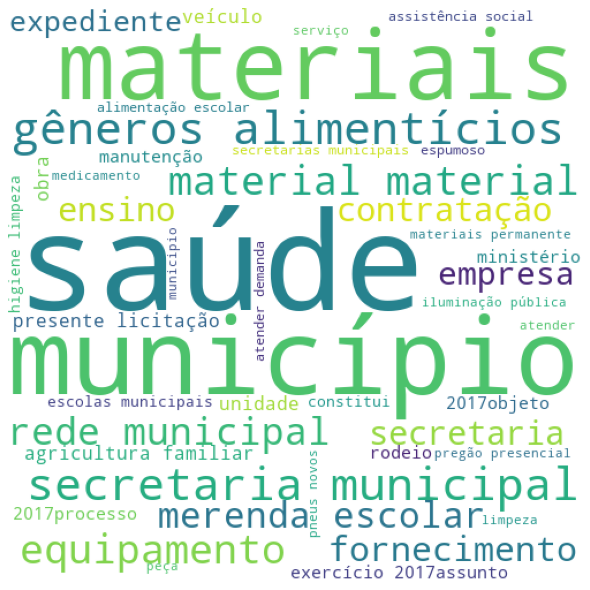

In [41]:
nuvem_palavras(licitacoes_licitante_proposta.DS_OBJETO)

# Carregando o arquivo de itens

In [42]:
itens=pd.read_csv('2017/item.csv', sep = ',', low_memory=False)

# Checando as colunas de itens para saber quais estão em comum com o dataframe de licitações, licitantes e propostas

In [43]:
print(itens.columns.values)

['CD_ORGAO' 'NR_LICITACAO' 'ANO_LICITACAO' 'CD_TIPO_MODALIDADE' 'NR_LOTE'
 'NR_ITEM' 'NR_ITEM_ORIGINAL' 'DS_ITEM' 'QT_ITENS' 'SG_UNIDADE_MEDIDA'
 'VL_UNITARIO_ESTIMADO' 'VL_TOTAL_ESTIMADO' 'DT_REF_VALOR_ESTIMADO'
 'PC_BDI_ESTIMADO' 'PC_ENCARGOS_SOCIAIS_ESTIMADO' 'CD_FONTE_REFERENCIA'
 'DS_FONTE_REFERENCIA' 'TP_RESULTADO_ITEM' 'VL_UNITARIO_HOMOLOGADO'
 'VL_TOTAL_HOMOLOGADO' 'PC_BDI_HOMOLOGADO'
 'PC_ENCARGOS_SOCIAIS_HOMOLOGADO' 'TP_ORCAMENTO' 'CD_TIPO_FAMILIA'
 'CD_TIPO_SUBFAMILIA' 'TP_DOCUMENTO' 'NR_DOCUMENTO' 'TP_DOCUMENTO.1'
 'NR_DOCUMENTO.1' 'TP_BENEFICIO_MICRO_EPP' 'PC_TX_ESTIMADA'
 'PC_TX_HOMOLOGADA']


# Juntando os dataframes de acordo com as colunas que estão em comum entre os dataframes

In [44]:
itens_licitacoes_licitante_proposta = pd.merge(licitacoes_licitante_proposta, itens, on=['CD_ORGAO', 'NR_LICITACAO', 'ANO_LICITACAO', 'CD_TIPO_MODALIDADE', 'NR_DOCUMENTO'])

In [45]:
itens_licitacoes_licitante_proposta

CD_ORGAO               NM_ORGAO  NR_LICITACAO  ANO_LICITACAO  \
0         82701        CM DE XANGRI-LÁ           1.0           2017   
1         77500          PM DE MORMAÇO           1.0           2017   
2         77500          PM DE MORMAÇO           1.0           2017   
3         77500          PM DE MORMAÇO           1.0           2017   
4         77500          PM DE MORMAÇO           1.0           2017   
...         ...                    ...           ...            ...   
25669     77700     PM DE MORRO REUTER           1.0           2017   
25670     50400             PM DE IRAÍ          20.0           2017   
25671     50400             PM DE IRAÍ          20.0           2017   
25672     50400             PM DE IRAÍ          20.0           2017   
25673     83000  PM DE BARRA DO QUARAÍ          19.0           2017   

      CD_TIPO_MODALIDADE NR_PROCESSO  ANO_PROCESSO TP_OBJETO  \
0                    PRP         507          2017       COM   
1                    CNV           2          2017       COM   
2                    CNV           2          2017       COM   
3                    CNV           2          2017       COM   
4                    CNV           2          2017       COM   
...                  ...         ...           ...       ...   
25669                CHP        1376          2017       COM   
25670                PRP          64          2017       COM   
25671                PRP          64          2017       COM   
25672                PRP          64          2017       COM   
25673                PRE         586          2017       COM   

      CD_TIPO_FASE_ATUAL TP_LICITACAO  ... PC_ENCARGOS_SOCIAIS_HOMOLOGADO  \
0                    ADH          MPR  ...                            NaN   
1                    ADH          MPR  ...                            0.0   
2                    ADH          MPR  ...                            0.0   
3                    ADH          MPR  ...                            0.0   
4                    ADH          MPR  ...                            0.0   
...                  ...          ...  ...                            ...   
25669                ADH          MPR  ...                            0.0   
25670                ADH          MPR  ...                            0.0   
25671                ADH          MPR  ...                            0.0   
25672                ADH          MPR  ...                            0.0   
25673                ADH          MPR  ...                            NaN   

       TP_ORCAMENTO CD_TIPO_FAMILIA CD_TIPO_SUBFAMILIA  TP_DOCUMENTO  \
0               NaN           320.0              632.0             J   
1               NaN             NaN                NaN             J   
2               NaN             NaN                NaN             J   
3               NaN             NaN                NaN             J   
4               NaN             NaN                NaN             J   
...             ...             ...                ...           ...   
25669           NaN             NaN                NaN             F   
25670           NaN             NaN                NaN             J   
25671           NaN             NaN                NaN             J   
25672           NaN             NaN                NaN             J   
25673           NaN             NaN                NaN             J   

      TP_DOCUMENTO.1  NR_DOCUMENTO.1  TP_BENEFICIO_MICRO_EPP PC_TX_ESTIMADA  \
0                NaN             NaN                     NaN            NaN   
1                NaN             NaN                       T            NaN   
2                NaN             NaN                       T            NaN   
3                NaN             NaN                       T            NaN   
4                NaN             NaN                       T            NaN   
...              ...             ...                     ...            ...   
25669            NaN             NaN      

# Checando os valores faltantes

In [46]:
print("Missing values: ", itens_licitacoes_licitante_proposta.isnull().sum())

Missing values:  CD_ORGAO                              0
NM_ORGAO                              0
NR_LICITACAO                          0
ANO_LICITACAO                         0
CD_TIPO_MODALIDADE                    0
NR_PROCESSO                           0
ANO_PROCESSO                          0
TP_OBJETO                             0
CD_TIPO_FASE_ATUAL                    0
TP_LICITACAO                          0
DS_OBJETO                             0
VL_LICITACAO                          0
NR_DOCUMENTO                          0
DT_PROPOSTA                           0
VL_TOTAL_PROPOSTA                     0
TP_RESULTADO_PROPOSTA                 0
NR_LOTE                               0
NR_ITEM                               0
NR_ITEM_ORIGINAL                      0
DS_ITEM                               0
QT_ITENS                              0
SG_UNIDADE_MEDIDA                     0
VL_UNITARIO_ESTIMADO                315
VL_TOTAL_ESTIMADO                   315
DT_REF_VALOR_ESTIMADO  

# Criando o novo dataframde com as colunas que não tem dados faltantes + as colunas de valores homologados

In [47]:
item = itens_licitacoes_licitante_proposta.loc[:,['CD_ORGAO', 'NM_ORGAO', 'NR_LICITACAO', 'ANO_LICITACAO', 'CD_TIPO_MODALIDADE', 'NR_PROCESSO', 'ANO_PROCESSO', 'TP_OBJETO', 'CD_TIPO_FASE_ATUAL', 'TP_LICITACAO', 'DS_OBJETO', 'VL_LICITACAO', 'NR_DOCUMENTO', 'DT_PROPOSTA', 'VL_TOTAL_PROPOSTA', 'TP_RESULTADO_PROPOSTA', 'NR_LOTE', 'NR_ITEM', 'NR_ITEM_ORIGINAL', 'DS_ITEM', 'QT_ITENS', 'SG_UNIDADE_MEDIDA', 'VL_UNITARIO_HOMOLOGADO', 'VL_TOTAL_HOMOLOGADO', 'TP_DOCUMENTO']]

# Removendo as linhas que não possuem os valores homologados

In [48]:
item = item.dropna(subset=['VL_UNITARIO_HOMOLOGADO', 'VL_TOTAL_HOMOLOGADO'])

In [49]:
item

CD_ORGAO               NM_ORGAO  NR_LICITACAO  ANO_LICITACAO  \
0         82701        CM DE XANGRI-LÁ           1.0           2017   
1         77500          PM DE MORMAÇO           1.0           2017   
2         77500          PM DE MORMAÇO           1.0           2017   
3         77500          PM DE MORMAÇO           1.0           2017   
4         77500          PM DE MORMAÇO           1.0           2017   
...         ...                    ...           ...            ...   
25669     77700     PM DE MORRO REUTER           1.0           2017   
25670     50400             PM DE IRAÍ          20.0           2017   
25671     50400             PM DE IRAÍ          20.0           2017   
25672     50400             PM DE IRAÍ          20.0           2017   
25673     83000  PM DE BARRA DO QUARAÍ          19.0           2017   

      CD_TIPO_MODALIDADE NR_PROCESSO  ANO_PROCESSO TP_OBJETO  \
0                    PRP         507          2017       COM   
1                    CNV           2          2017       COM   
2                    CNV           2          2017       COM   
3                    CNV           2          2017       COM   
4                    CNV           2          2017       COM   
...                  ...         ...           ...       ...   
25669                CHP        1376          2017       COM   
25670                PRP          64          2017       COM   
25671                PRP          64          2017       COM   
25672                PRP          64          2017       COM   
25673                PRE         586          2017       COM   

      CD_TIPO_FASE_ATUAL TP_LICITACAO  ... TP_RESULTADO_PROPOSTA  NR_LOTE  \
0                    ADH          MPR  ...                     C        1   
1                    ADH          MPR  ...                     C        1   
2                    ADH          MPR  ...                     C        1   
3                    ADH          MPR  ...                     C        1   
4                    ADH          MPR  ...                     C        1   
...                  ...          ...  ...                   ...      ...   
25669                ADH          MPR  ...                     C        1   
25670                ADH          MPR  ...                     C        1   
25671                ADH          MPR  ...                     C        1   
25672                ADH          MPR  ...                     C        1   
25673                ADH          MPR  ...                     C        1   

      NR_ITEM NR_ITEM_ORIGINAL  \
0           1                1   
1           9                9   
2           8                8   
3           7                7   
4           4                4   
...       ...              ...   
25669      29               29   
25670       3                3   
25671       2                2   
25672       1                1   
25673       1                1   

                                                 DS_ITEM  QT_ITENS  \
0      AQUISIÇÃO DE POLTRONA DE AUDITÓRIO PARA PLENÁR...       1.0   
1                  Telha fibrocimento 6mm de 2,13 x 1,05     118.0   
2                                              Forro PVC      85.0   
3                 janela de ferro p/banheiro 0,40 x 0,40       1.0   
4                     Tijolo maciço 20 furos 9 x 14 x 19    1000.0   
...                                                  ...       ...   
25669                                              LIMÃO     300.0   
25670                             LITROS DE DIESEL COMUM  150000.0   
25671                               LITROS OLEO TIPO S10  100000.0   
25672                           LITROS DE GASOLINA COMUM   80000.0   
25673                               AQUISIÇÃO DE VEÍCULO       1.0   

       SG_UNIDADE_MEDIDA  VL_UNITARIO_HOMOLOGADO VL_TOTAL_HOMOLOGADO  \
0                     UN                52600.00             52600.0   
1                     UN                   40.00              4720

In [50]:
print("Missing values: ", item.isnull().sum())

Missing values:  CD_ORGAO                  0
NM_ORGAO                  0
NR_LICITACAO              0
ANO_LICITACAO             0
CD_TIPO_MODALIDADE        0
NR_PROCESSO               0
ANO_PROCESSO              0
TP_OBJETO                 0
CD_TIPO_FASE_ATUAL        0
TP_LICITACAO              0
DS_OBJETO                 0
VL_LICITACAO              0
NR_DOCUMENTO              0
DT_PROPOSTA               0
VL_TOTAL_PROPOSTA         0
TP_RESULTADO_PROPOSTA     0
NR_LOTE                   0
NR_ITEM                   0
NR_ITEM_ORIGINAL          0
DS_ITEM                   0
QT_ITENS                  0
SG_UNIDADE_MEDIDA         0
VL_UNITARIO_HOMOLOGADO    0
VL_TOTAL_HOMOLOGADO       0
TP_DOCUMENTO              0
dtype: int64


In [106]:
item.to_csv('2017/arquivo_2017.txt')

# Observando a estatistica das colunas numéricas do novo dataframe

In [51]:
item.describe()

CD_ORGAO   NR_LICITACAO  ANO_LICITACAO  ANO_PROCESSO  VL_LICITACAO  \
count  25518.000000   25518.000000        25518.0       25518.0  2.551800e+04   
mean   59240.099616    1401.192256         2017.0        2017.0  2.247986e+05   
std    12566.968562   19346.595015            0.0           0.0  1.066178e+06   
min      900.000000       1.000000         2017.0        2017.0  0.000000e+00   
25%    48400.000000       5.000000         2017.0        2017.0  1.204891e+04   
50%    59800.000000      12.000000         2017.0        2017.0  4.078688e+04   
75%    67100.000000      24.000000         2017.0        2017.0  1.269014e+05   
max    88329.000000  704003.000000         2017.0        2017.0  1.187761e+07   

       VL_TOTAL_PROPOSTA      NR_LOTE        NR_ITEM      QT_ITENS  \
count       2.551800e+04  25518.00000   25518.000000  2.551800e+04   
mean        1.317083e+05      1.03668   12103.702524  4.997675e+03   
std         5.315891e+05      3.74510   53823.929318  9.287150e+04   
min         0.000000e+00      0.00000       1.000000  0.000000e+00   
25%         9.261890e+03      1.00000      10.000000  6.000000e+00   
50%         2.169755e+04      1.00000      29.000000  3.000000e+01   
75%         5.250893e+04      1.00000      70.000000  2.000000e+02   
max         2.393829e+07    298.00000  290086.000000  6.000000e+06   

       VL_UNITARIO_HOMOLOGADO  VL_TOTAL_HOMOLOGADO  
count            2.551800e+04         2.551800e+04  
mean             2.767438e+03         9.621748e+03  
std              5.811645e+04         1.025416e+05  
min              0.000000e+00         0.000000e+00  
25%              2.242175e+00         9.282750e+01  
50%              6.500000e+00         3.728750e+02  
75%              3.960000e+01         1.680000e+03  
max              5.811800e+06         5.811800e+06

# Testando se a nuvem de palavras apresenta palavras que fazem sentido no contexto, a fim de obter informações sobre os itens comprados

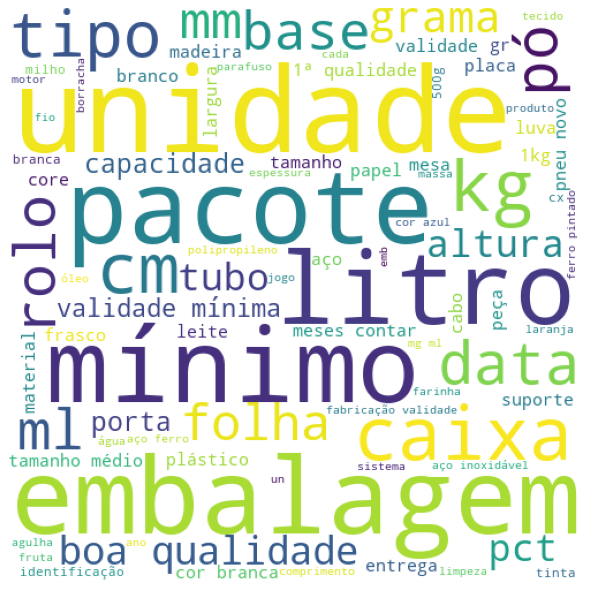

In [52]:
nuvem_palavras(item.DS_ITEM)

### Como pôde ser visto na nuvem, algumas palavras fazem sentido, mas existem outras que devem ser usadas como stop words e não devem ser levadas em consideração, como por exemplo, kg, gr, mm, altura, grama, etc. Portanto, irei testar outro caminho que seria através da frequência das palavras que mais aparecem.

In [53]:
item.DS_ITEM

0        AQUISIÇÃO DE POLTRONA DE AUDITÓRIO PARA PLENÁR...
1                    Telha fibrocimento 6mm de 2,13 x 1,05
2                                                Forro PVC
3                   janela de ferro p/banheiro 0,40 x 0,40
4                       Tijolo maciço 20 furos 9 x 14 x 19
                               ...                        
25669                                                LIMÃO
25670                               LITROS DE DIESEL COMUM
25671                                 LITROS OLEO TIPO S10
25672                             LITROS DE GASOLINA COMUM
25673                                 AQUISIÇÃO DE VEÍCULO
Name: DS_ITEM, Length: 25518, dtype: object

# convertendo todas as palavras em minúsculas para que uma mesma palavra não seja contabilizada em 2 chaves de dicionário distintas

In [54]:
minusculas = item["DS_ITEM"].to_string().lower()

In [55]:
minusculas

'0        aquisição de poltrona de auditório para plenár...\n1                    telha fibrocimento 6mm de 2,13 x 1,05\n2                                                forro pvc\n3                   janela de ferro p/banheiro 0,40 x 0,40\n4                       tijolo maciço 20 furos 9 x 14 x 19\n5                                              areia média\n6                janela de ferro com veneziana 1,20 x 1,00\n7        madeira parede beneficiada de eucalipto - 2,70...\n8              cumeeira fibrocimento 6mm 20% de inclinação\n9                    telha fibrocimento 6mm de 1,83 x 1,05\n10                porta de ferro 0,80 x 2,10 com fechadura\n11                                      cal hidratado 20kg\n12                                        cimento cp2 50kg\n13       suco concentrado de frutas confrome a safra (s...\n14       vagem in natura, fresca, tamanho e coloração u...\n15       tomate, 1º qualidade, grau medio de amadurecim...\n16       repolho verde, de 1º qualidade

# Splitando a string e armazenando em uma lista de palavras

In [56]:
lista = minusculas.split()

In [57]:
lista

['0',
 'aquisição',
 'de',
 'poltrona',
 'de',
 'auditório',
 'para',
 'plenár...',
 '1',
 'telha',
 'fibrocimento',
 '6mm',
 'de',
 '2,13',
 'x',
 '1,05',
 '2',
 'forro',
 'pvc',
 '3',
 'janela',
 'de',
 'ferro',
 'p/banheiro',
 '0,40',
 'x',
 '0,40',
 '4',
 'tijolo',
 'maciço',
 '20',
 'furos',
 '9',
 'x',
 '14',
 'x',
 '19',
 '5',
 'areia',
 'média',
 '6',
 'janela',
 'de',
 'ferro',
 'com',
 'veneziana',
 '1,20',
 'x',
 '1,00',
 '7',
 'madeira',
 'parede',
 'beneficiada',
 'de',
 'eucalipto',
 '-',
 '2,70...',
 '8',
 'cumeeira',
 'fibrocimento',
 '6mm',
 '20%',
 'de',
 'inclinação',
 '9',
 'telha',
 'fibrocimento',
 '6mm',
 'de',
 '1,83',
 'x',
 '1,05',
 '10',
 'porta',
 'de',
 'ferro',
 '0,80',
 'x',
 '2,10',
 'com',
 'fechadura',
 '11',
 'cal',
 'hidratado',
 '20kg',
 '12',
 'cimento',
 'cp2',
 '50kg',
 '13',
 'suco',
 'concentrado',
 'de',
 'frutas',
 'confrome',
 'a',
 'safra',
 '(s...',
 '14',
 'vagem',
 'in',
 'natura,',
 'fresca,',
 'tamanho',
 'e',
 'coloração',
 'u...',
 '

# Os índices da coluna do dataframe também entraram na string e consequentemente na lista, então aqui vou removê-los

In [58]:
novos_items = [item for item in lista if not item.isdigit()]

In [59]:
novos_items

['aquisição',
 'de',
 'poltrona',
 'de',
 'auditório',
 'para',
 'plenár...',
 'telha',
 'fibrocimento',
 '6mm',
 'de',
 '2,13',
 'x',
 '1,05',
 'forro',
 'pvc',
 'janela',
 'de',
 'ferro',
 'p/banheiro',
 '0,40',
 'x',
 '0,40',
 'tijolo',
 'maciço',
 'furos',
 'x',
 'x',
 'areia',
 'média',
 'janela',
 'de',
 'ferro',
 'com',
 'veneziana',
 '1,20',
 'x',
 '1,00',
 'madeira',
 'parede',
 'beneficiada',
 'de',
 'eucalipto',
 '-',
 '2,70...',
 'cumeeira',
 'fibrocimento',
 '6mm',
 '20%',
 'de',
 'inclinação',
 'telha',
 'fibrocimento',
 '6mm',
 'de',
 '1,83',
 'x',
 '1,05',
 'porta',
 'de',
 'ferro',
 '0,80',
 'x',
 '2,10',
 'com',
 'fechadura',
 'cal',
 'hidratado',
 '20kg',
 'cimento',
 'cp2',
 '50kg',
 'suco',
 'concentrado',
 'de',
 'frutas',
 'confrome',
 'a',
 'safra',
 '(s...',
 'vagem',
 'in',
 'natura,',
 'fresca,',
 'tamanho',
 'e',
 'coloração',
 'u...',
 'tomate,',
 '1º',
 'qualidade,',
 'grau',
 'medio',
 'de',
 'amadurecim...',
 'repolho',
 'verde,',
 'de',
 '1º',
 'qualida

# Contando a frequência de cada palavra da lista e armazenando em um dicionário onde as chaves são as palavras e os valores são as frequências

In [60]:
import collections
contagens = dict(collections.Counter(novos_items))

In [61]:
contagens

{'aquisição': 155,
 'de': 9815,
 'poltrona': 21,
 'auditório': 1,
 'para': 2299,
 'plenár...': 1,
 'telha': 21,
 'fibrocimento': 19,
 '6mm': 16,
 '2,13': 2,
 'x': 1141,
 '1,05': 2,
 'forro': 15,
 'pvc': 126,
 'janela': 43,
 'ferro': 82,
 'p/banheiro': 1,
 '0,40': 4,
 'tijolo': 27,
 'maciço': 11,
 'furos': 37,
 'areia': 34,
 'média': 87,
 'com': 3159,
 'veneziana': 1,
 '1,20': 5,
 '1,00': 4,
 'madeira': 101,
 'parede': 17,
 'beneficiada': 4,
 'eucalipto': 15,
 '-': 2097,
 '2,70...': 1,
 'cumeeira': 4,
 '20%': 11,
 'inclinação': 2,
 '1,83': 3,
 'porta': 92,
 '0,80': 5,
 '2,10': 6,
 'fechadura': 3,
 'cal': 11,
 'hidratado': 19,
 '20kg': 6,
 'cimento': 49,
 'cp2': 1,
 '50kg': 3,
 'suco': 95,
 'concentrado': 28,
 'frutas': 60,
 'confrome': 2,
 'a': 400,
 'safra': 11,
 '(s...': 2,
 'vagem': 16,
 'in': 120,
 'natura,': 64,
 'fresca,': 11,
 'tamanho': 554,
 'e': 919,
 'coloração': 11,
 'u...': 27,
 'tomate,': 21,
 '1º': 73,
 'qualidade,': 276,
 'grau': 97,
 'medio': 18,
 'amadurecim...': 3,
 '

# Ordenando o dicionário do maior para o menor para uma melhor visualização

In [77]:
contagens_ordenadas = dict(sorted(contagens.items(), key=lambda x: x[1], reverse=True))

In [63]:
contagens_ordenadas

{'de': 9815,
 'com': 3159,
 'para': 2299,
 '-': 2097,
 'em': 1544,
 '...': 1469,
 'x': 1141,
 'e': 919,
 'tipo': 808,
 'c/': 694,
 'mg': 665,
 'papel': 643,
 'embalagem': 626,
 'tamanho': 554,
 'pneu': 493,
 'cor': 474,
 'nº': 458,
 'sem': 453,
 'ml': 442,
 'a': 400,
 'kg': 382,
 'do': 371,
 'caixa': 370,
 'pacote': 367,
 'cm': 366,
 'pó': 361,
 'fita': 356,
 'pct': 311,
 'g': 306,
 'cx': 300,
 'branco': 280,
 'aço': 279,
 'qualidade,': 276,
 'tinta': 275,
 'tecido': 262,
 'cola': 250,
 'saco': 249,
 'mm': 243,
 'material': 236,
 'doce': 235,
 'cores': 234,
 'leite': 233,
 'verde': 232,
 'no': 232,
 'carne': 231,
 'óleo': 230,
 'cabo': 230,
 'da': 228,
 'pincel': 227,
 'preto': 223,
 'p/': 221,
 'farinha': 218,
 '1ª': 217,
 'tubo': 217,
 'grande': 212,
 'boa': 211,
 'gr': 208,
 'm': 208,
 'milho': 207,
 'unidades': 206,
 'un': 204,
 'qualidade': 203,
 'litros': 203,
 'plástico': 202,
 'filtro': 202,
 'luva': 200,
 'c...': 198,
 'ar': 198,
 'pão': 197,
 'massa': 195,
 'base': 195,
 'nov

# Criando a lista de palavras que não deve ser contabilizada

In [78]:
# Lista de palavras que não serão contabilizadas
novas_stopwords = ["de", "da", "do", "para", "dos", "das", "cor", "...", "tamanho",
                     "em", "aquisição", "por", "preço", "registro", "mm", "cm", "mg", 
                     "preços", "um", "através", "na", "no", "ou", "a", "kg", "ml", "branco",
                     "compra", "uso", "com", "x", "e", "-", "¿", "qualidade,", "g",
                      "nº","processo", "objeto", "p/", "c/", "100%", "tipo", "sem", "cx"]

# Removendo as stop words do dicionário

In [79]:
for chave in novas_stopwords:
    contagens_ordenadas.pop(chave)

In [80]:
contagens_ordenadas

{'papel': 643,
 'embalagem': 626,
 'pneu': 493,
 'caixa': 370,
 'pacote': 367,
 'pó': 361,
 'fita': 356,
 'pct': 311,
 'aço': 279,
 'tinta': 275,
 'tecido': 262,
 'cola': 250,
 'saco': 249,
 'material': 236,
 'doce': 235,
 'cores': 234,
 'leite': 233,
 'verde': 232,
 'carne': 231,
 'óleo': 230,
 'cabo': 230,
 'pincel': 227,
 'preto': 223,
 'farinha': 218,
 '1ª': 217,
 'tubo': 217,
 'grande': 212,
 'boa': 211,
 'gr': 208,
 'm': 208,
 'milho': 207,
 'unidades': 206,
 'un': 204,
 'qualidade': 203,
 'litros': 203,
 'plástico': 202,
 'filtro': 202,
 'luva': 200,
 'c...': 198,
 'ar': 198,
 'pão': 197,
 'massa': 195,
 'base': 195,
 'novo': 193,
 'azul': 193,
 'mínimo': 189,
 'mesa': 186,
 'branca': 184,
 'cartucho': 184,
 'caneta': 183,
 'lixo': 181,
 'rolo': 178,
 'folha': 174,
 'pasta': 174,
 'frasco': 174,
 'cp': 171,
 'folhas': 167,
 'fio': 166,
 'd...': 161,
 'biscoito': 159,
 '+': 159,
 'conforme': 158,
 'descartável': 156,
 'agulha': 155,
 'água': 154,
 ',': 149,
 'hp': 147,
 'ponta': 

# Selecionando as 15 palavras com mais frequência para fazer um gráfico de barras

In [81]:
import itertools
itens_despesas = dict(itertools.islice(contagens_ordenadas.items(), 0, 15))

In [82]:
itens_despesas

{'papel': 643,
 'embalagem': 626,
 'pneu': 493,
 'caixa': 370,
 'pacote': 367,
 'pó': 361,
 'fita': 356,
 'pct': 311,
 'aço': 279,
 'tinta': 275,
 'tecido': 262,
 'cola': 250,
 'saco': 249,
 'material': 236,
 'doce': 235}

# Gráfico de barras com as palavras que aparecem com mais frequência na descrição dos itens, assim podemos saber os itens que estão relacionados com os maiores gastos

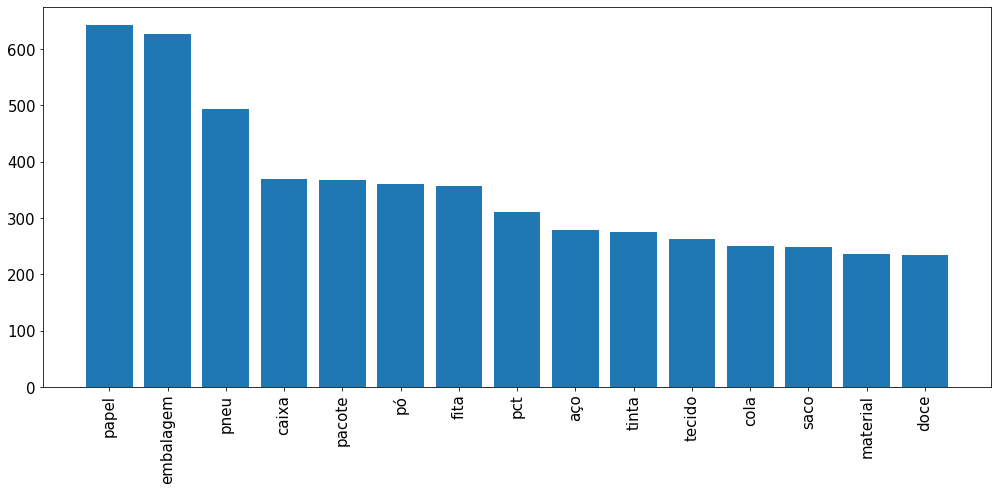

In [83]:
keys = itens_despesas.keys()
values = itens_despesas.values()
plt.rcParams.update({'font.size': 15})

plt.figure(figsize=(17,7))
plt.bar(keys, values)
plt.xticks(range(15), rotation='vertical')
plt.show()

# Usando a Lei de Benford para estudar as amostras do mesmo tipo, buscando encontrar dados inconsistêntes, errôneos ou até mesmo fraudes

In [84]:
import benford as bf

# Fazendo o estudo relacionado aos valores homologados dos itens

In [85]:
item_bf = item.VL_TOTAL_HOMOLOGADO

### Aqui estou levando em consideração os primeiros 2 dígitos (10 - 99). Os dígitos em amarelo são os dígitos considerados inconsistentes, ou seja, esse dígitos acharam inconsistência nos dados


Initialized sequence with 25373 registries.
First_2_Dig
10    0.036929
11    0.037875
12    0.033776
13    0.030071
14    0.032200
15    0.027746
16    0.024514
17    0.024948
18    0.022780
19    0.025815
20    0.020376
21    0.018208
22    0.018248
23    0.017262
24    0.020691
25    0.016750
26    0.016514
27    0.014622
28    0.014779
29    0.016987
30    0.015725
31    0.012454
32    0.013006
33    0.012494
34    0.012730
35    0.013558
36    0.012178
37    0.009971
38    0.011232
39    0.014543
40    0.012494
41    0.007331
42    0.010365
43    0.009459
44    0.009853
45    0.010050
46    0.008592
47    0.009025
48    0.009656
49    0.010917
50    0.010641
51    0.006030
52    0.009459
53    0.007291
54    0.008947
55    0.006464
56    0.006306
57    0.006385
58    0.006818
59    0.009183
60    0.009617
61    0.005045
62    0.006306
63    0.006148
64    0.006976
65    0.005557
66    0.005478
67    0.005912
68    0.006109
69    0.007212
70    0.008277
71    0.005360
72    0.00705

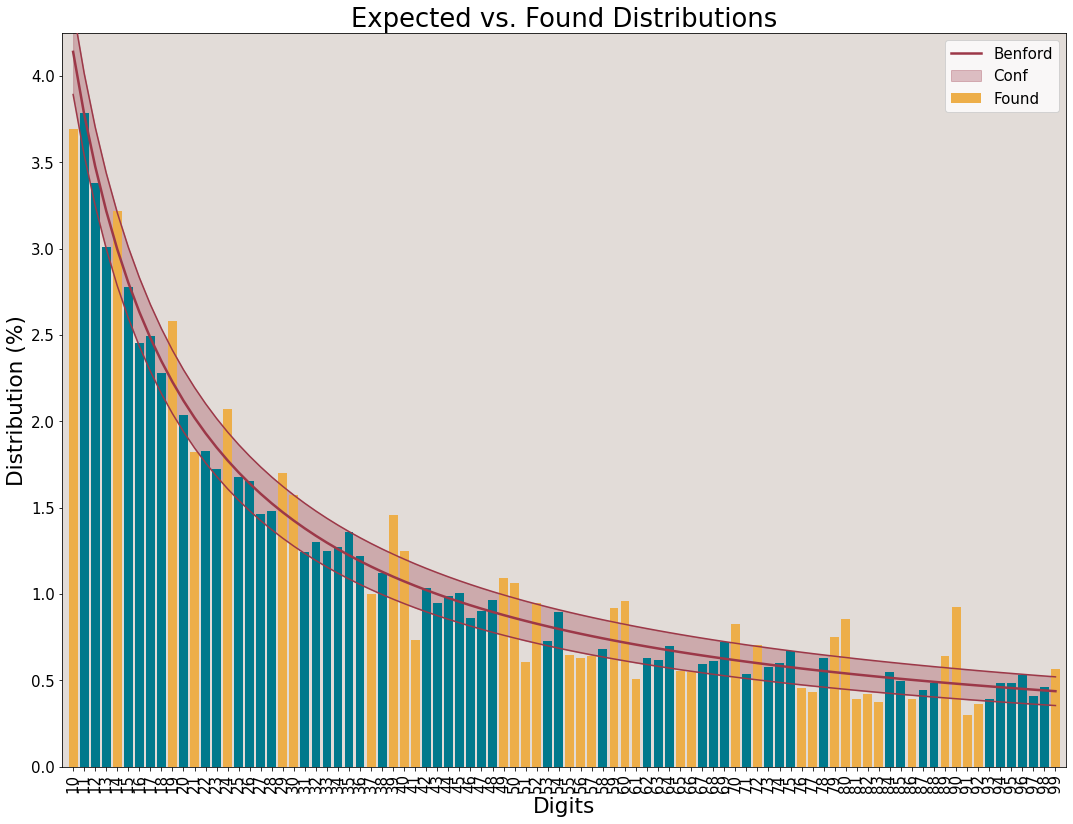

In [86]:
f2d = bf.first_digits(item_bf, digs=2, decimals=8, confidence=95)

# Cruzando os dígitos com o dataframe

### Copiando o dataframe para alterar o novo, selecionando apenas os 3 primeiro dígitos com mais inconsistência (90, 80 e 39)

In [87]:
itens_digitos = item

# Convertendo a coluna de float para string

In [88]:
itens_digitos['VL_TOTAL_HOMOLOGADO'] = itens_digitos['VL_TOTAL_HOMOLOGADO'].astype(str)

# Selecionando as linhas cujos valores de VL_TOTAL_HOMOLOGADO começam com 90, 80 e 39

In [89]:
dados_incosistentes = pd.DataFrame(itens_digitos.loc[itens_digitos['VL_TOTAL_HOMOLOGADO'].str.startswith(('90', '80', '39'))])

In [90]:
dados_incosistentes

CD_ORGAO                                        NM_ORGAO  NR_LICITACAO  \
37        40500                                  PM DE ALPESTRE           1.0   
127       73200                              PM DE VISTA GAÚCHA           1.0   
172       73200                              PM DE VISTA GAÚCHA           2.0   
282       59800                        PM DE SÃO VICENTE DO SUL           1.0   
292       59800                        PM DE SÃO VICENTE DO SUL           1.0   
323       70600                                   PM DE RELVADO           2.0   
465       63800                       PM DE FORTALEZA DOS VALOS           3.0   
479       54700                                  PM DE PLANALTO           4.0   
480       54700                                  PM DE PLANALTO           4.0   
533       54700                                  PM DE PLANALTO           5.0   
536       54700                                  PM DE PLANALTO           5.0   
550       54700                                  PM DE PLANALTO           6.0   
567       54700                                  PM DE PLANALTO           6.0   
587       54700                                  PM DE PLANALTO           6.0   
592       54700                                  PM DE PLANALTO           6.0   
630       79800                           PM DE SAGRADA FAMÍLIA           2.0   
633       79800                           PM DE SAGRADA FAMÍLIA           2.0   
636       79800                           PM DE SAGRADA FAMÍLIA           2.0   
643       79800                           PM DE SAGRADA FAMÍLIA           2.0   
645       79800                           PM DE SAGRADA FAMÍLIA           2.0   
687       40700                                PM DE ANTA GORDA           4.0   
705       40500                                  PM DE ALPESTRE           7.0   
721       55900                             PM DE RODEIO BONITO           1.0   
755       55900                             PM DE RODEIO BONITO           1.0   
780       55900                             PM DE RODEIO BONITO           2.0   
802       55900                             PM DE RODEIO BONITO           2.0   
813       55900                             PM DE RODEIO BONITO           2.0   
924       77500                                   PM DE MORMAÇO           5.0   
979       48400                      PM DE FREDERICO WESTPHALEN           1.0   
1008      48400                      PM DE FREDERICO WESTPHALEN           1.0   
1141      53701                      CM DE PALMEIRA DAS MISSÕES           1.0   
1273      65600                             PM DE CAMPOS BORGES           2.0   
1280      65600                             PM DE CAMPOS BORGES           2.0   
1338      65600                             PM DE CAMPOS BORGES           3.0   
1361      65600                             PM DE CAMPOS BORGES           3.0   
1396      65600                             PM DE CAMPOS BORGES           4.0   
1399      65600                             PM DE CAMPOS BORGES           4.0   
1457      65600                             PM DE CAMPOS BORGES           4.0   
1592      65600                             PM DE CAMPOS BORGES           5.0   
1629      73200                              PM DE VISTA GAÚCHA           3.0   
1660      73200                              PM DE VISTA GAÚCHA           3.0   
1691      73200                              PM DE VISTA GAÚCHA           1.0   
1789      73300                          PM DE SALDANHA MARINHO           5.0   
1897      73300                          PM DE SALDANHA MARINHO           3.0   
1918      73300                          PM DE SALDANHA MARINHO           3.0   
1978      67100                                 PM DE ERNESTINA           1.0   
1986      67100                                 PM DE ERNESTINA           1.0   
1990      67100                                 PM DE ERNESTINA           1.0   
1993      67100                       

# Checando quais orgão tiveram mais dados inconsistentes referentes à coluna VL_TOTAL_HOMOLOGADO

In [91]:
dados_incosistentes['NM_ORGAO'].value_counts()

PM DE FREDERICO WESTPHALEN                        63
PM DE SEBERI                                      51
PM DE RIO GRANDE                                  49
PM DE RODEIO BONITO                               43
PM DE SÃO VICENTE DO SUL                          41
PM DE ERNESTINA                                   36
PM DE AUGUSTO PESTANA                             34
PM DE SALTO DO JACUÍ                              32
PM DE PLANALTO                                    32
PM DE CAMPOS BORGES                               30
PM DE ESPUMOSO                                    30
PM DE ALPESTRE                                    25
PM DE IBIRUBÁ                                     21
PM DE VISTA GAÚCHA                                21
PM DE IRAÍ                                        20
PM DE PINHAL                                      20
PM DE ARROIO DO TIGRE                             19
PM DE SAGRADA FAMÍLIA                             17
PM DE SALDANHA MARINHO                        

# Fazendo o estudo relacionado aos valores totais das propostas

In [92]:
total_proposta_bf = item.VL_TOTAL_PROPOSTA


Initialized sequence with 25516 registries.
First_2_Dig
10    0.032646
11    0.032293
12    0.028609
13    0.030569
14    0.037702
15    0.031039
16    0.020575
17    0.024534
18    0.029315
19    0.025788
20    0.023201
21    0.015441
22    0.023436
23    0.019517
24    0.014383
25    0.010150
26    0.031353
27    0.013168
28    0.016068
29    0.011483
30    0.023515
31    0.015089
32    0.008975
33    0.008975
34    0.008465
35    0.014344
36    0.019360
37    0.009955
38    0.007094
39    0.009210
40    0.011013
41    0.006075
42    0.008348
43    0.012228
44    0.012580
45    0.009915
46    0.015990
47    0.004233
48    0.005212
49    0.007329
50    0.009327
51    0.005369
52    0.005291
53    0.014540
54    0.006741
55    0.013639
56    0.005016
57    0.006427
58    0.008661
59    0.005330
60    0.005722
61    0.007015
62    0.008073
63    0.009563
64    0.008465
65    0.004272
66    0.009523
67    0.009759
68    0.006075
69    0.010033
70    0.004389
71    0.002665
72    0.00666

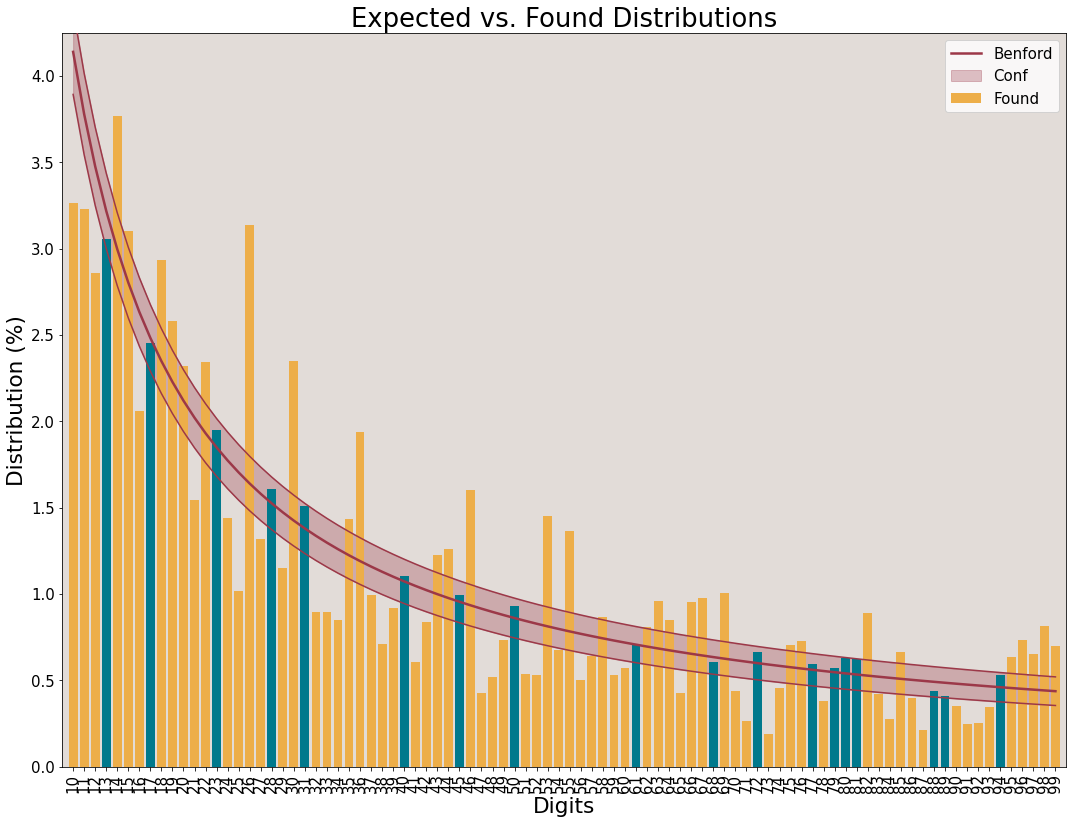

In [93]:
f2d = bf.first_digits(total_proposta_bf, digs=2, decimals=8, confidence=95)

# Cruzando os dígitos com o dataframe

### Copiando o dataframe para alterar o novo, selecionando apenas os 3 primeiro dígitos com mais inconsistência (26, 30 e 53)

In [94]:
itens_digitos = item

# Convertendo a coluna de float para string

In [95]:
itens_digitos['VL_TOTAL_PROPOSTA'] = itens_digitos['VL_TOTAL_PROPOSTA'].astype(str)

# Selecionando as linhas cujos valores de VL_TOTAL_HOMOLOGADO começam com 26, 30 e 53

In [96]:
dados_incosistentes = pd.DataFrame(itens_digitos.loc[itens_digitos['VL_TOTAL_PROPOSTA'].str.startswith(('26','30', '53'))])

In [97]:
dados_incosistentes

CD_ORGAO             NM_ORGAO  NR_LICITACAO  ANO_LICITACAO  \
38        40500       PM DE ALPESTRE           1.0           2017   
39        40500       PM DE ALPESTRE           1.0           2017   
262       55900  PM DE RODEIO BONITO           1.0           2017   
927       77500        PM DE MORMAÇO           5.0           2017   
928       77500        PM DE MORMAÇO           5.0           2017   
...         ...                  ...           ...            ...   
25485     54900   PM DE PORTO ALEGRE         319.0           2017   
25588     54900   PM DE PORTO ALEGRE         253.0           2017   
25589     54900   PM DE PORTO ALEGRE         253.0           2017   
25590     54900   PM DE PORTO ALEGRE         253.0           2017   
25591     54900   PM DE PORTO ALEGRE         253.0           2017   

      CD_TIPO_MODALIDADE      NR_PROCESSO  ANO_PROCESSO TP_OBJETO  \
38                   PRP                1          2017       COM   
39                   PRP                1          2017       COM   
262                  CHP                1          2017       COM   
927                  CNV                8          2017       COM   
928                  CNV                8          2017       COM   
...                  ...              ...           ...       ...   
25485                PRE  001.000474.17.7          2017       COM   
25588                PRE  001.000403.17.2          2017       COM   
25589                PRE  001.000403.17.2          2017       COM   
25590                PRE  001.000403.17.2          2017       COM   
25591                PRE  001.000403.17.2          2017       COM   

      CD_TIPO_FASE_ATUAL TP_LICITACAO  ... TP_RESULTADO_PROPOSTA  NR_LOTE  \
38                   ADH          MPR  ...                     C        1   
39                   ADH          MPR  ...                     C        1   
262                  ADH          MPR  ...                     C        1   
927                  ADH          MPR  ...                     C        1   
928                  ADH          MPR  ...                     C        1   
...                  ...          ...  ...                   ...      ...   
25485                ADH          MPR  ...                     C        1   
25588                ADH          MPR  ...                     C        1   
25589                ADH          MPR  ...                     C        1   
25590                ADH          MPR  ...                     C        1   
25591                ADH          MPR  ...                     C        1   

      NR_ITEM NR_ITEM_ORIGINAL  \
38          3                3   
39          2                2   
262        19               19   
927         7                7   
928         4                4   
...       ...              ...   
25485      26               26   
25588       6          1095298   
25589       7          1095306   
25590       8          1095314   
25591       9          1095322   

                                                 DS_ITEM  QT_ITENS  \
38                                        GASOLINA COMUM   50000.0   
39                                       OLEO DIESEL S10  100000.0   
262                         Mandioca processada pc 01 kg     600.0   
927    Biscoito doce tipo MariaIngredientes obrigatór...     180.0   
928    Arroz polidoSubgrupo: Polido     Classe: longo...     420.0   
...                                                  ...       ...   
25485  KIBE BOVINO CONGELADO, PORCOES DE 50G APROX, C...     600.0   
25588  CARTUCHO PP 5µ 10" X 2½", CONFORME ANEXO VI DO...      15.0   
25589  CARTUCHO CARVAO ATIVADO 10" X 2½", CONFORME AN...      15.0   
25590     MEMBRANA 100 GPD, CONFORME ANEXO VI DO EDITAL.      10.0   
25591  COLUNA SOBRESSALENTE 10"X 2½", CONFORME ANEXO ...      60.0   

       SG_UNIDADE_MEDIDA  VL_UNITARIO_HOMOLOGADO VL_TOTAL_HOMOLOGADO  \
38                     L                    4.22            211000.0   
39                     L      

# Checando quais orgão tiveram mais dados inconsistentes referentes à coluna VL_TOTAL_PROPOSTA

In [98]:
dados_incosistentes['NM_ORGAO'].value_counts()

PM DE SALDANHA MARINHO                                       187
PM DE SEBERI                                                 173
PM DE LINDOLFO COLLOR                                        170
PM DE FREDERICO WESTPHALEN                                   159
PM DE ERNESTINA                                              149
CIA. DE DESENV. DE CAXIAS DO SUL                             125
PM DE CAMPOS BORGES                                           99
PM DE SÃO VICENTE DO SUL                                      98
PM DE ESPUMOSO                                                74
PM DE RIO GRANDE                                              72
PM DE PINHAL                                                  71
PM DE ALPESTRE                                                62
PM DE SEVERIANO DE ALMEIDA                                    37
PM DE SAGRADA FAMÍLIA                                         36
PM DE PLANALTO                                                34
PM DE VISTA GAÚCHA       

# Fazendo o estudo relacionado aos valores de licitação

In [99]:
vl_licitacao_bf = item.VL_LICITACAO


Initialized sequence with 21269 registries.
First_2_Dig
10    0.026659
11    0.040199
12    0.040670
13    0.032583
14    0.021628
15    0.017960
16    0.030185
17    0.035639
18    0.024966
19    0.023038
20    0.026894
21    0.007523
22    0.014810
23    0.024543
24    0.029338
25    0.022756
26    0.020875
27    0.015563
28    0.010861
29    0.027740
30    0.007429
31    0.012224
32    0.019418
33    0.009685
34    0.017819
35    0.022850
36    0.009074
37    0.011801
38    0.013917
39    0.012648
40    0.003808
41    0.000564
42    0.002022
43    0.006206
44    0.008557
45    0.015986
46    0.003620
47    0.026094
48    0.015798
49    0.003667
50    0.018148
51    0.013071
52    0.006864
53    0.010673
54    0.014105
55    0.005266
56    0.005313
57    0.004608
58    0.001881
59    0.012506
60    0.007476
61    0.009403
62    0.000799
63    0.009544
64    0.011754
65    0.006112
66    0.005783
67    0.001458
68    0.001081
69    0.009638
70    0.016456
71    0.004890
72    0.00249

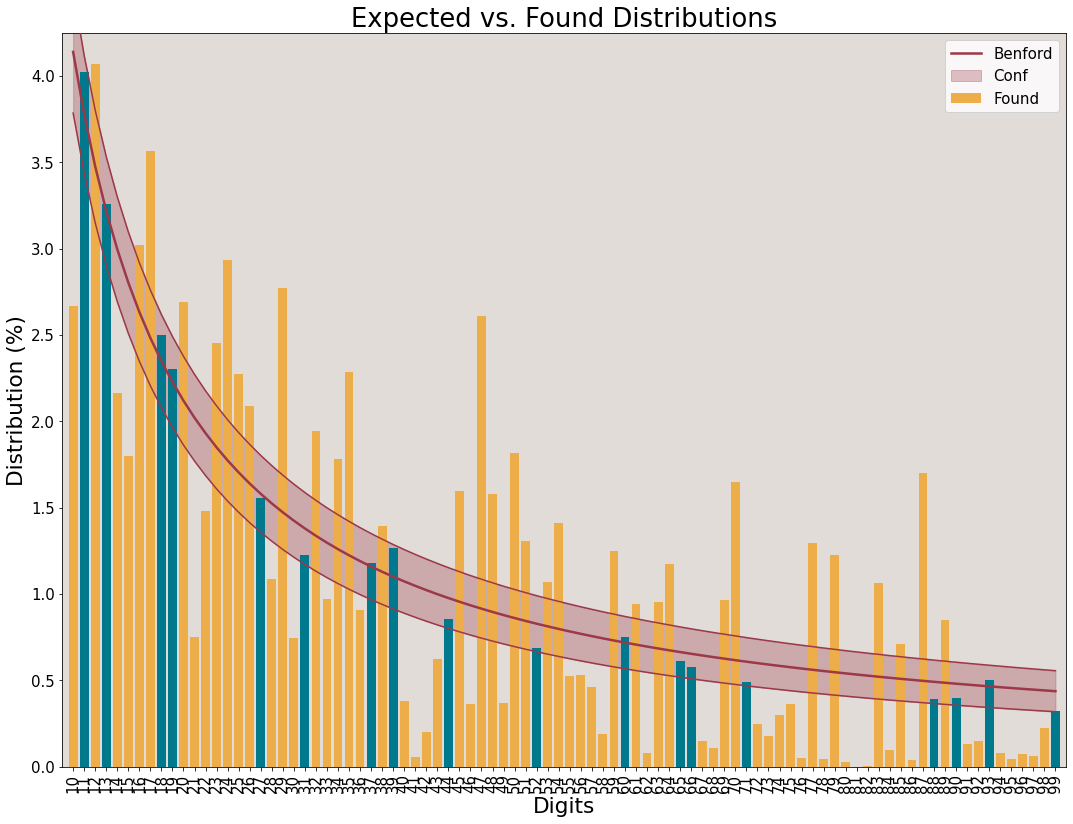

In [100]:
f2d = bf.first_digits(vl_licitacao_bf, digs=2, decimals=8, confidence=99)

# Cruzando os dígitos com o dataframe

### Copiando o dataframe para alterar o novo, selecionando apenas os 3 primeiro dígitos com mais inconsistência (47, 87 e 70)

In [101]:
itens_digitos = item

# Convertendo a coluna de float para string

In [102]:
itens_digitos['VL_LICITACAO'] = itens_digitos['VL_LICITACAO'].astype(str)

# Selecionando as linhas cujos valores de VL_TOTAL_HOMOLOGADO começam com 47, 87 e 70

In [103]:
dados_incosistentes = pd.DataFrame(itens_digitos.loc[itens_digitos['VL_LICITACAO'].str.startswith(('47', '87', '70'))])

In [104]:
dados_incosistentes

CD_ORGAO               NM_ORGAO  NR_LICITACAO  ANO_LICITACAO  \
384       77500          PM DE MORMAÇO           3.0           2017   
385       77500          PM DE MORMAÇO           3.0           2017   
386       77500          PM DE MORMAÇO           3.0           2017   
387       77500          PM DE MORMAÇO           3.0           2017   
388       77500          PM DE MORMAÇO           3.0           2017   
...         ...                    ...           ...            ...   
25063     88047         PM DE TIO HUGO           6.0           2017   
25064     88047         PM DE TIO HUGO           6.0           2017   
25065     88047         PM DE TIO HUGO           6.0           2017   
25066     88047         PM DE TIO HUGO           6.0           2017   
25496     88045  PM DE SÃO JOSÉ DO SUL          20.0           2017   

      CD_TIPO_MODALIDADE NR_PROCESSO  ANO_PROCESSO TP_OBJETO  \
384                  CNV           6          2017       COM   
385                  CNV           6          2017       COM   
386                  CNV           6          2017       COM   
387                  CNV           6          2017       COM   
388                  CNV           6          2017       COM   
...                  ...         ...           ...       ...   
25063                CNV          13          2017       COM   
25064                CNV          13          2017       COM   
25065                CNV          13          2017       COM   
25066                CNV          13          2017       COM   
25496                PRP          22          2017       COM   

      CD_TIPO_FASE_ATUAL TP_LICITACAO  ... TP_RESULTADO_PROPOSTA NR_LOTE  \
384                  ADH          MPR  ...                     C       1   
385                  ADH          MPR  ...                     C       1   
386                  ADH          MPR  ...                     C       1   
387                  ADH          MPR  ...                     C       1   
388                  ADH          MPR  ...                     C       1   
...                  ...          ...  ...                   ...     ...   
25063                ADH          MPR  ...                     C       1   
25064                ADH          MPR  ...                     C       1   
25065                ADH          MPR  ...                     C       1   
25066                ADH          MPR  ...                     C       1   
25496                ADH          MPR  ...                     C       1   

      NR_ITEM NR_ITEM_ORIGINAL  \
384        24               24   
385        23               23   
386        20               20   
387        19               19   
388        18               18   
...       ...              ...   
25063      28               28   
25064      29               29   
25065      34               34   
25066      41               41   
25496       1                1   

                                                 DS_ITEM QT_ITENS  \
384                          Vassoura cerdas de plástico     25.0   
385                                     Toca descartável    100.0   
386    Saco para lixo (pacotes com 10 unid capacidade...    150.0   
387                          Sacola plástica branca 5 kg    250.0   
388                                     Sabonete de 90 g     30.0   
...                                                  ...      ...   
25063                ODORIZADOR DE AMBIENTE FR DE 360 ML     24.0   
25064  MULTI USO 01 LITRO, COM BRILHO (PARA LIMPEZA D...    100.0   
25065                PRENDEDOR DE ROUPA, PCT. COM 12 UND     50.0   
25066   SACO PLÁSTICO PARA FREEZER 5 KG C/ 100 UNIDADES.     12.0   
25496  01\tUnd\tAnel Trava, nº Eaton 3315752  03\tUnd...      1.0   

       SG_UNIDADE_MEDIDA  VL_UNITARIO_HOMOLOGADO VL_TOTAL_HOMOLOGADO  \
384                   UN                    5.34               133.5   
385                   UN                    0.21                21.0   
386               

# Checando quais orgão tiveram mais dados inconsistentes referentes à coluna VL_LICITACAO

In [105]:
dados_incosistentes['NM_ORGAO'].value_counts()

PM DE ALPESTRE                                         427
PM DE SEBERI                                           172
PM DE SÃO VICENTE DO SUL                               156
CONS. INTERM. LAR DE ACOLHIMENTO SÃO FRANCISCO          87
PM DE TIO HUGO                                          87
PM DE SALTO DO JACUÍ                                    43
PM DE VISTA GAÚCHA                                      42
PM DE PLANALTO                                          42
PM DE VERA CRUZ                                         41
PM DE CAPELA DE SANTANA                                 36
PM DE FREDERICO WESTPHALEN                              32
PM DE SALDANHA MARINHO                                  27
PM DE MORMAÇO                                           24
PM DE AUGUSTO PESTANA                                   16
PM DE BENTO GONÇALVES                                   11
PM DE RODEIO BONITO                                      5
PROCURADORIA-GERAL DE JUSTIÇA                           